**INSURANCE PROJECT**

In [79]:
#import all neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
#load the data set
data=pd.read_csv("/content/Updated_Claimants_Dataset.csv")
data.head()

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0        5         0     0.0       1.0       0.0    50.0   2367.86   
1        3         1     1.0       0.0       0.0    18.0   3746.41   
2       66         1     0.0       1.0       0.0     5.0  14282.43   
3       70         0     0.0       1.0       1.0    31.0    519.12   
4       96         1     0.0       1.0       0.0    30.0   1354.31   

  Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0            Severe                 4497.19                      1   
1             Minor                 6216.38                      1   
2            Severe                17978.55                      0   
3            Severe                  753.54                      1   
4             Minor                 2167.42                      0   

   Settlement_Amount    Policy_Type  Driving_Record  
0            3221.74    Third-Party           Clean  
1            6166.17  Comprehensive           Clean  
2           13804.61  Comprehensive  Minor Offenses  
3             596.25  Comprehensive           Clean  
4            1714.83  Comprehensive           Clean

In [81]:
#To print shape of data
print(data.shape)

(1340, 13)


In [82]:
#To print data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB
None


In [83]:
#To find duplicates
data.duplicated().sum()

0

In [84]:
#To check the distribution of data
data.describe()

CASENUM     ATTORNEY       CLMSEX     CLMINSUR     SEATBELT  \
count   1340.000000  1340.000000  1328.000000  1299.000000  1292.000000   
mean   11202.001493     0.488806     0.558735     0.907621     0.017028   
std     9512.750796     0.500061     0.496725     0.289671     0.129425   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     4177.000000     0.000000     0.000000     1.000000     0.000000   
50%     8756.500000     0.000000     1.000000     1.000000     0.000000   
75%    15702.500000     1.000000     1.000000     1.000000     0.000000   
max    34153.000000     1.000000     1.000000     1.000000     1.000000   

            CLMAGE          LOSS  Claim_Amount_Requested  \
count  1151.000000   1340.000000             1340.000000   
mean     28.414422   6684.598149            10341.430276   
std      20.304451   3785.039412             5678.906970   
min       0.000000    296.410000              562.760000   
25%       9.000000   3414.052500             5308.890000   
50%      30.000000   6781.575000            10571.250000   
75%      43.000000   9708.882500            15291.665000   
max      95.000000  15794.810000            19988.570000   

       Claim_Approval_Status  Settlement_Amount  
count            1340.000000        1340.000000  
mean                0.480597        8787.805463  
std                 0.499810        4942.577454  
min                 0.000000         424.520000  
25%                 0.000000        4389.100000  
50%                 0.000000        8898.245000  
75%                 1.000000       12646.157500  
max                 1.000000       19566.510000

In [85]:
# Check for outliers in 'LOSS', 'Claim_Amount_Requested', and 'Settlement_Amount'
def check_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers in {col}:\n{outliers[[col]]}\n")

check_outliers(data, ['LOSS', 'Claim_Amount_Requested', 'Settlement_Amount'])

Outliers in LOSS:
Empty DataFrame
Columns: [LOSS]
Index: []

Outliers in Claim_Amount_Requested:
Empty DataFrame
Columns: [Claim_Amount_Requested]
Index: []

Outliers in Settlement_Amount:
Empty DataFrame
Columns: [Settlement_Amount]
Index: []



In [86]:
#To check the null values
data.isnull().sum()

CASENUM                     0
ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

In [87]:
#remove the clmage
data.drop('CLMAGE',axis=1,inplace=True)

In [88]:
#remove the casenum
data.drop('CASENUM',axis=1,inplace=True)

In [89]:
data

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT      LOSS Accident_Severity  \
0            0     0.0       1.0       0.0   2367.86            Severe   
1            1     1.0       0.0       0.0   3746.41             Minor   
2            1     0.0       1.0       0.0  14282.43            Severe   
3            0     0.0       1.0       1.0    519.12            Severe   
4            1     0.0       1.0       0.0   1354.31             Minor   
...        ...     ...       ...       ...       ...               ...   
1335         1     0.0       1.0       0.0  11749.94          Moderate   
1336         0     1.0       1.0       0.0    776.62          Moderate   
1337         1     1.0       1.0       0.0  13261.20            Severe   
1338         0     1.0       0.0       0.0   9919.60             Minor   
1339         1     1.0       1.0       0.0  10548.36          Moderate   

      Claim_Amount_Requested  Claim_Approval_Status  Settlement_Amount  \
0                    4497.19                      1            3221.74   
1                    6216.38                      1            6166.17   
2                   17978.55                      0           13804.61   
3                     753.54                      1             596.25   
4                    2167.42                      0            1714.83   
...                      ...                    ...                ...   
1335                14992.27                      0           13533.51   
1336                 1438.79                      0            1178.05   
1337                18106.45                      1           16782.44   
1338                17119.15                      1           14315.98   
1339                13522.19                      1           11138.01   

        Policy_Type  Driving_Record  
0       Third-Party           Clean  
1     Comprehensive           Clean  
2     Comprehensive  Minor Offenses  
3     Comprehensive           Clean  
4     Comprehensive           Clean  
...             ...             ...  
1335  Comprehensive           Clean  
1336    Third-Party  Major Offenses  
1337    Third-Party  Minor Offenses  
1338    Third-Party           Clean  
1339    Third-Party           Clean  

[1340 rows x 11 columns]

In [90]:
#Missing value imputaion for clmsex,clminsurance and clmseatbelt
data['CLMSEX']=data['CLMSEX'].fillna(data['CLMSEX'].mode()[0])
data['CLMINSUR']=data['CLMINSUR'].fillna(data['CLMINSUR'].mode()[0])
data['SEATBELT']=data['SEATBELT'].fillna(data['SEATBELT'].mode()[0])

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ATTORNEY                1340 non-null   int64  
 1   CLMSEX                  1340 non-null   float64
 2   CLMINSUR                1340 non-null   float64
 3   SEATBELT                1340 non-null   float64
 4   LOSS                    1340 non-null   float64
 5   Accident_Severity       1340 non-null   object 
 6   Claim_Amount_Requested  1340 non-null   float64
 7   Claim_Approval_Status   1340 non-null   int64  
 8   Settlement_Amount       1340 non-null   float64
 9   Policy_Type             1340 non-null   object 
 10  Driving_Record          1340 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 115.3+ KB


Univariate analysis for ATTORNEY:
count    1340.000000
mean        0.488806
std         0.500061
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ATTORNEY, dtype: float64


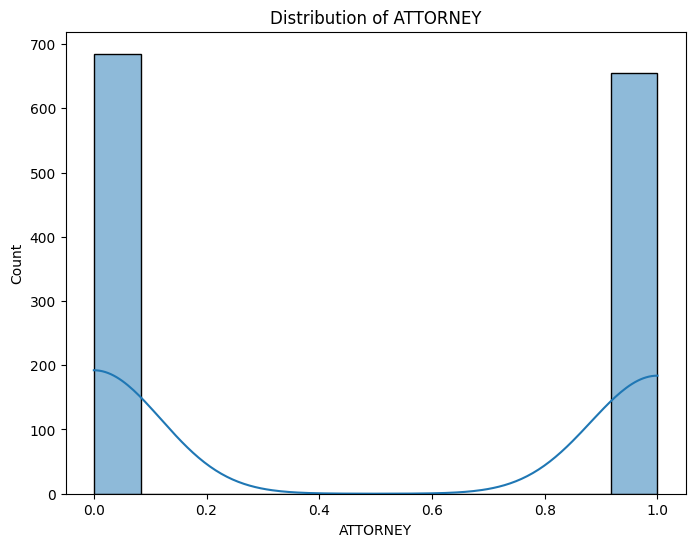

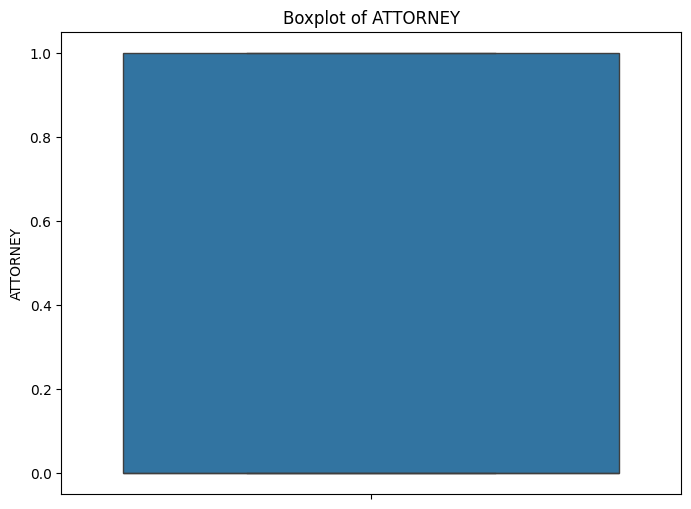

------------------------------
Univariate analysis for CLMSEX:
count    1340.000000
mean        0.562687
std         0.496240
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CLMSEX, dtype: float64


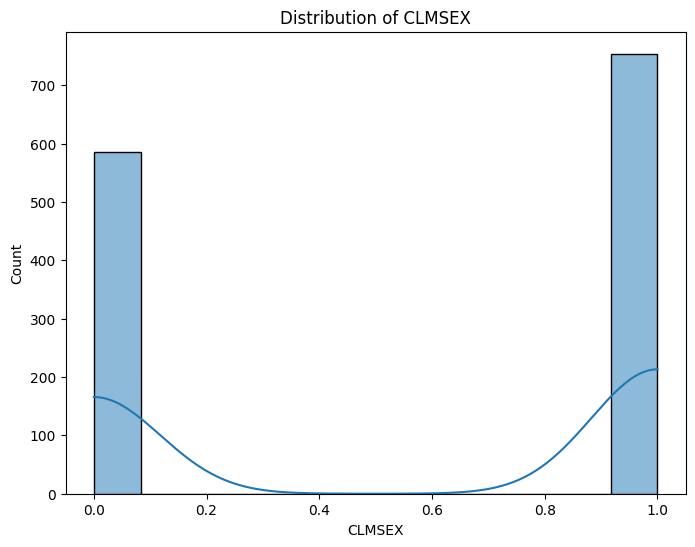

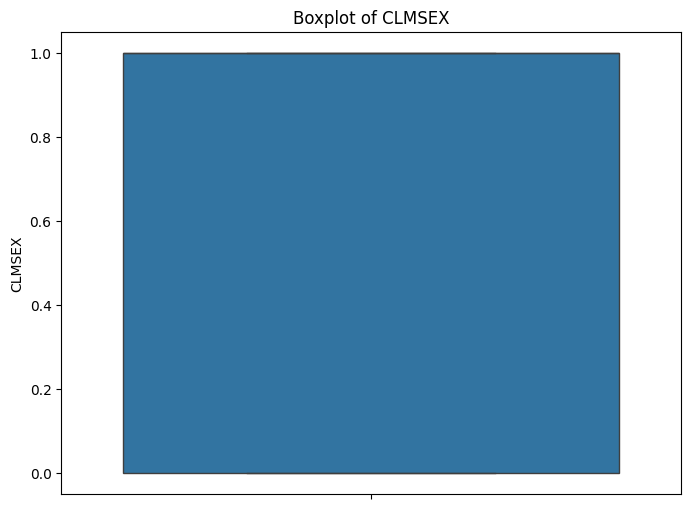

------------------------------
Univariate analysis for CLMINSUR:
count    1340.000000
mean        0.910448
std         0.285646
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CLMINSUR, dtype: float64


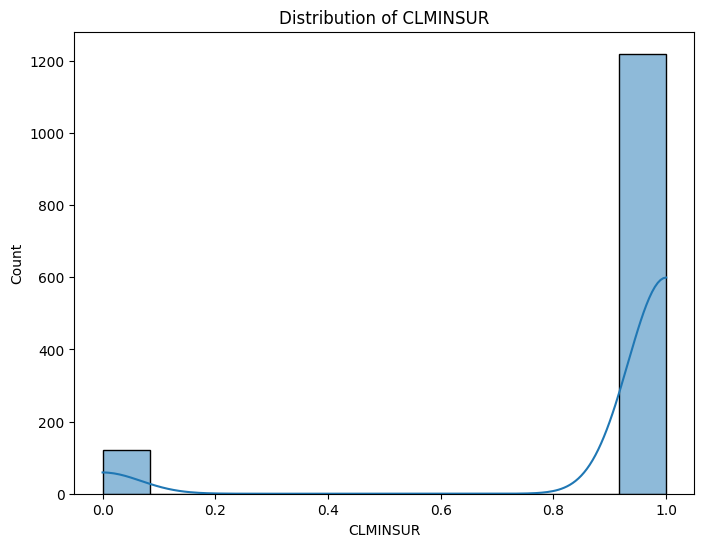

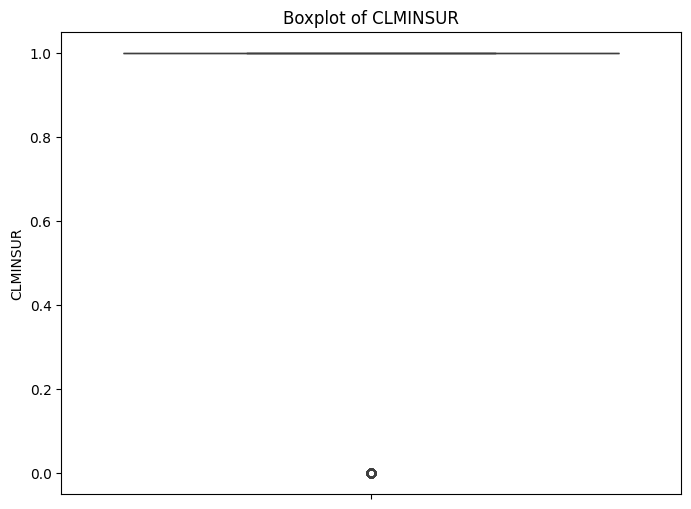

------------------------------
Univariate analysis for SEATBELT:
count    1340.000000
mean        0.016418
std         0.127124
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SEATBELT, dtype: float64


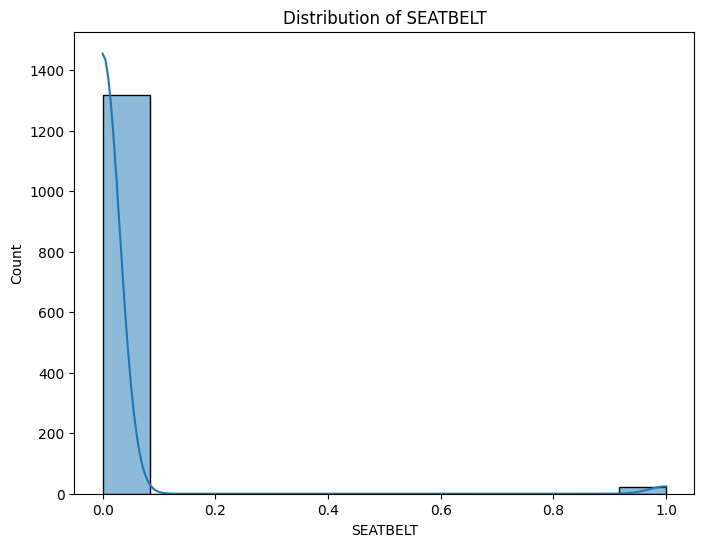

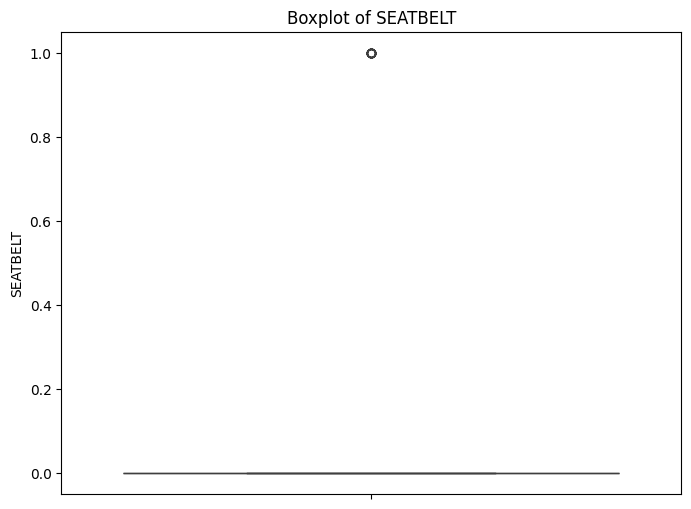

------------------------------
Univariate analysis for LOSS:
count     1340.000000
mean      6684.598149
std       3785.039412
min        296.410000
25%       3414.052500
50%       6781.575000
75%       9708.882500
max      15794.810000
Name: LOSS, dtype: float64


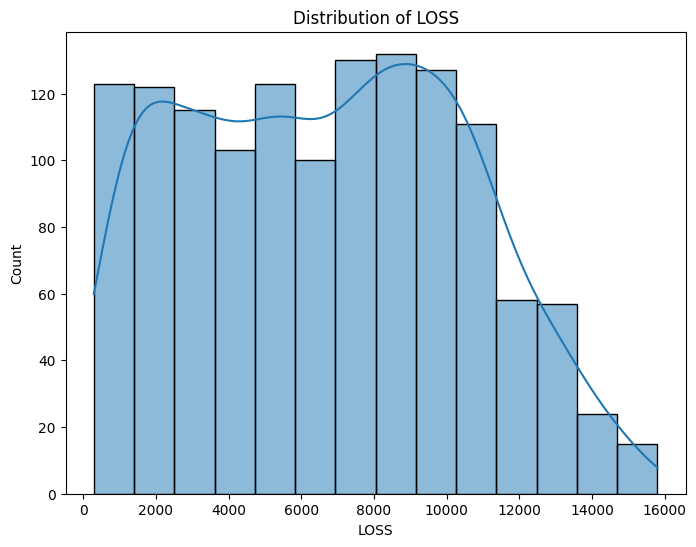

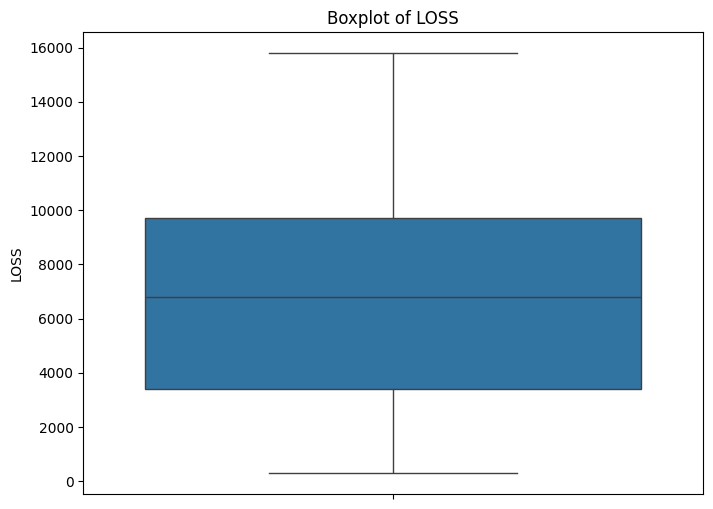

------------------------------
Univariate analysis for Claim_Amount_Requested:
count     1340.000000
mean     10341.430276
std       5678.906970
min        562.760000
25%       5308.890000
50%      10571.250000
75%      15291.665000
max      19988.570000
Name: Claim_Amount_Requested, dtype: float64


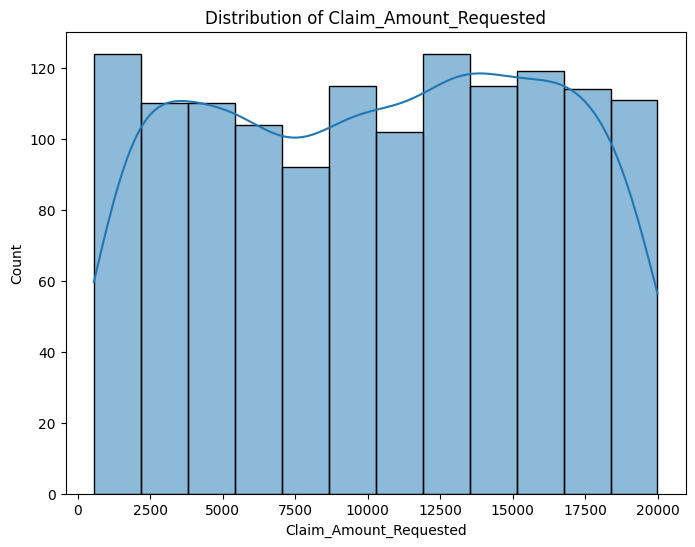

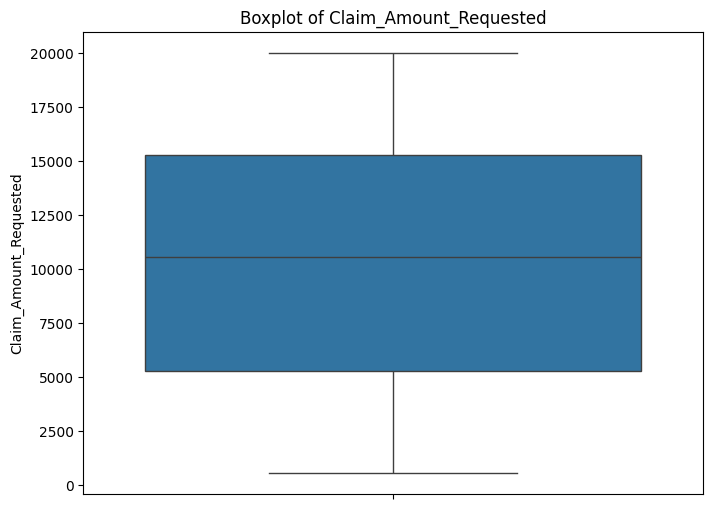

------------------------------
Univariate analysis for Claim_Approval_Status:
count    1340.000000
mean        0.480597
std         0.499810
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Claim_Approval_Status, dtype: float64


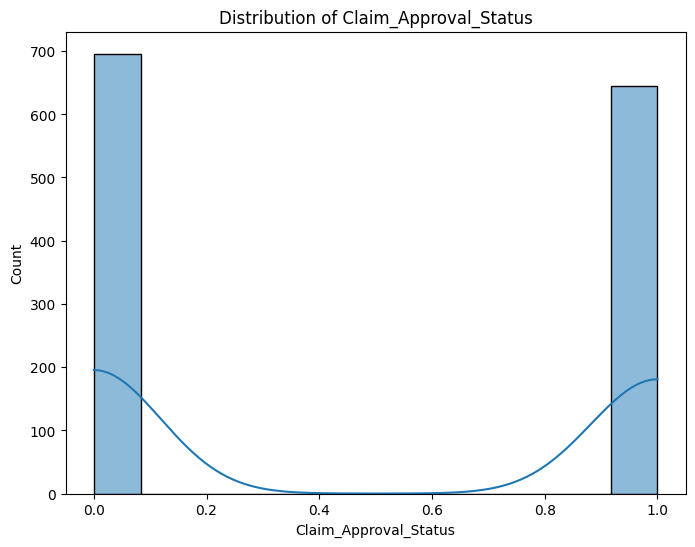

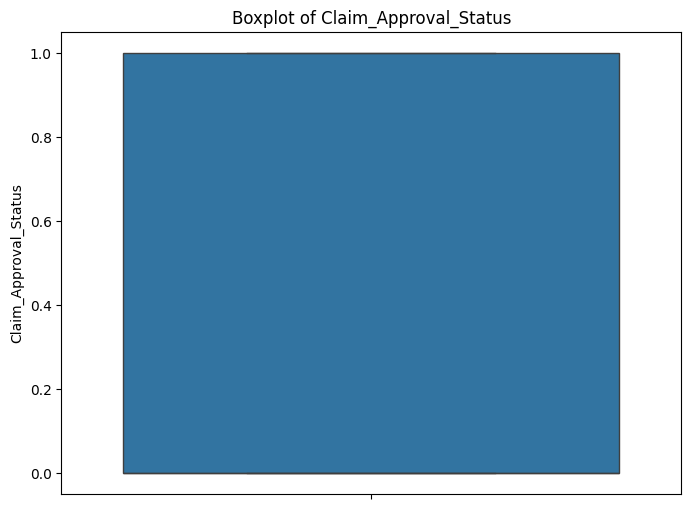

------------------------------
Univariate analysis for Settlement_Amount:
count     1340.000000
mean      8787.805463
std       4942.577454
min        424.520000
25%       4389.100000
50%       8898.245000
75%      12646.157500
max      19566.510000
Name: Settlement_Amount, dtype: float64


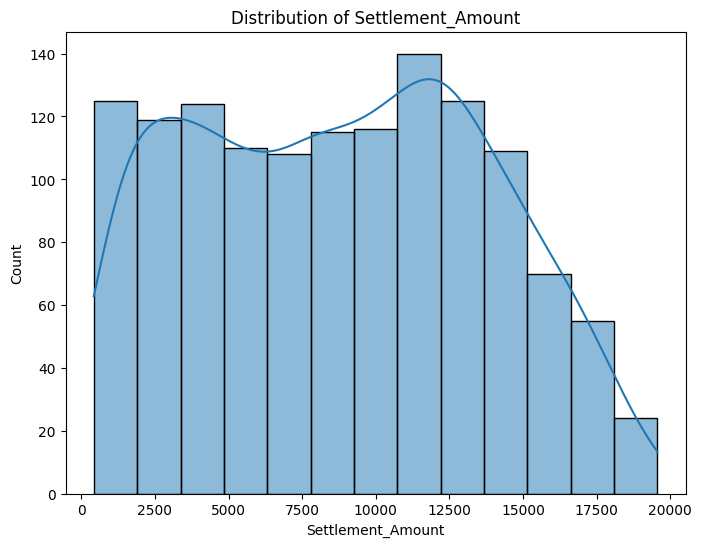

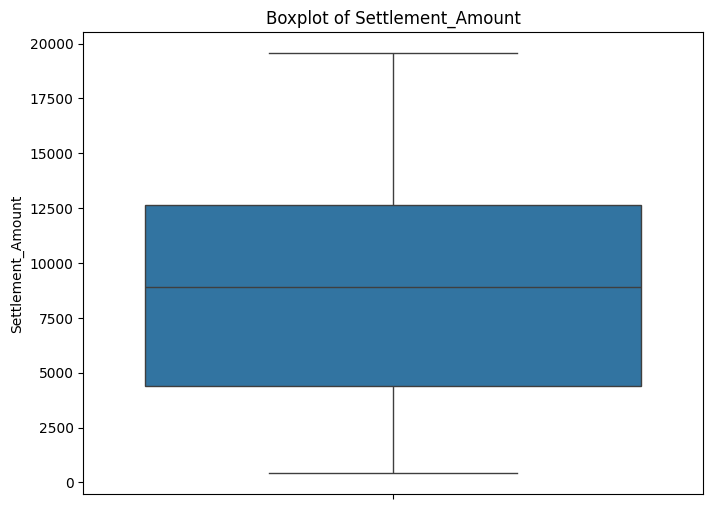

------------------------------
Univariate analysis for Accident_Severity:
Accident_Severity
Minor       465
Severe      440
Moderate    435
Name: count, dtype: int64


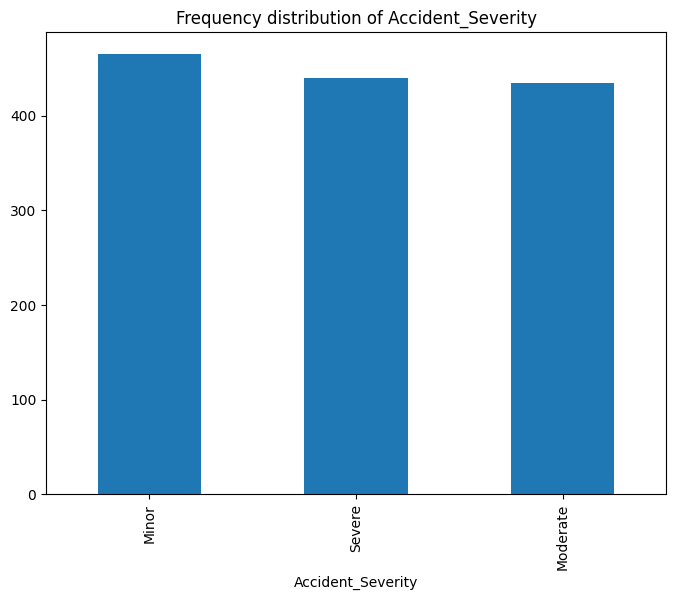

------------------------------
Univariate analysis for Policy_Type:
Policy_Type
Comprehensive    689
Third-Party      651
Name: count, dtype: int64


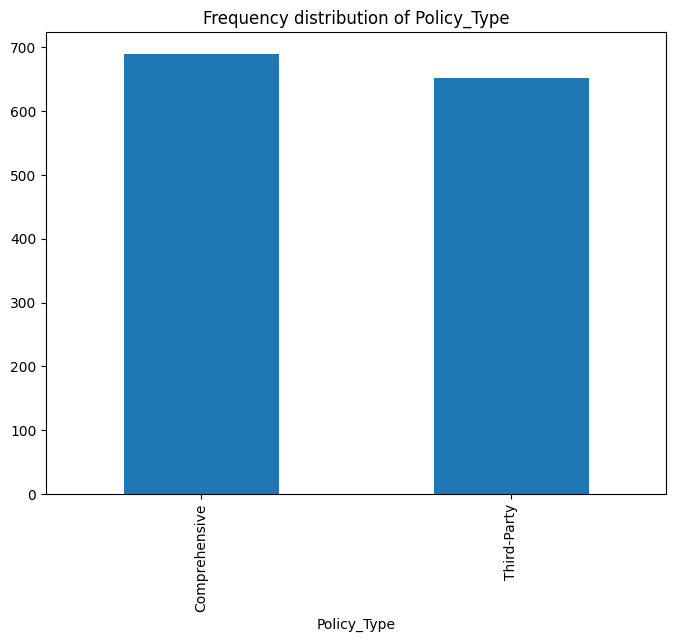

------------------------------
Univariate analysis for Driving_Record:
Driving_Record
Minor Offenses    473
Clean             448
Major Offenses    419
Name: count, dtype: int64


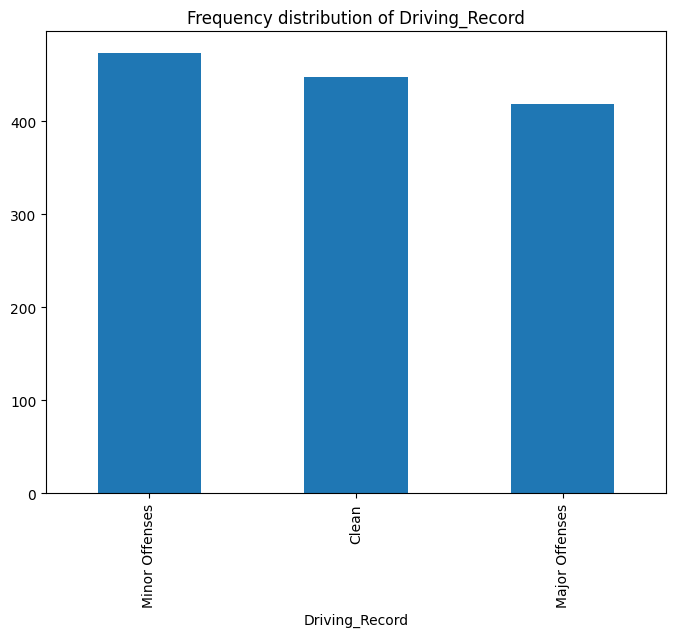

------------------------------


In [92]:
# Univariate analysis for numerical variables
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    print(f"Univariate analysis for {col}:")
    print(data[col].describe())  # Summary statistics
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Histogram with KDE
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])  # Boxplot to visualize outliers
    plt.title(f"Boxplot of {col}")
    plt.show()
    print("-" * 30)

# Univariate analysis for categorical variables
categorical_cols = data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(f"Univariate analysis for {col}:")
    print(data[col].value_counts())  # Frequency counts
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')  # Bar plot of frequencies
    plt.title(f"Frequency distribution of {col}")
    plt.show()
    print("-" * 30)

Bivariate analysis for ATTORNEY vs. CLMSEX:


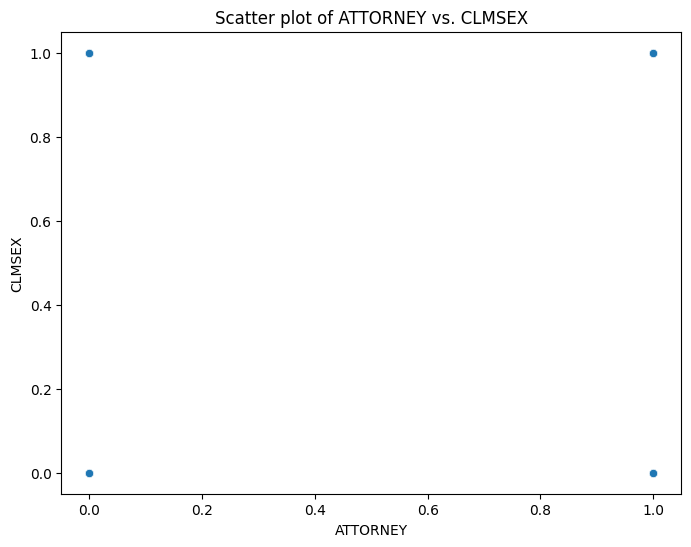

Correlation between ATTORNEY and CLMSEX: 0.07656434729424944
------------------------------
Bivariate analysis for ATTORNEY vs. CLMINSUR:


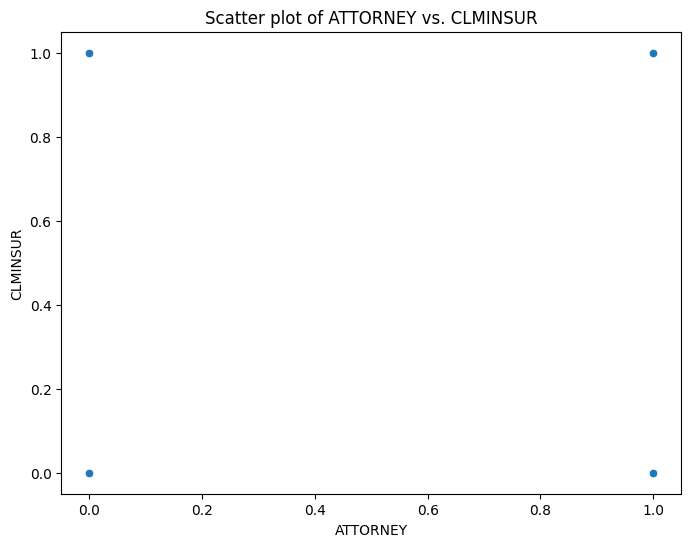

Correlation between ATTORNEY and CLMINSUR: 0.07663109111972204
------------------------------
Bivariate analysis for ATTORNEY vs. SEATBELT:


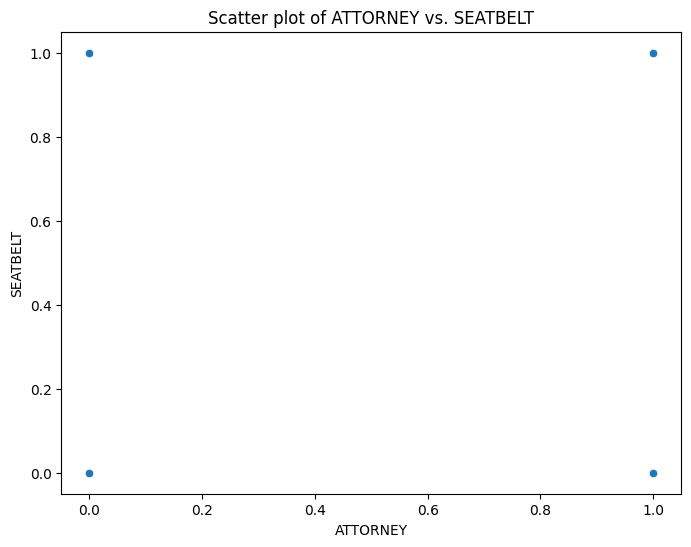

Correlation between ATTORNEY and SEATBELT: -0.0558475918487326
------------------------------
Bivariate analysis for ATTORNEY vs. LOSS:


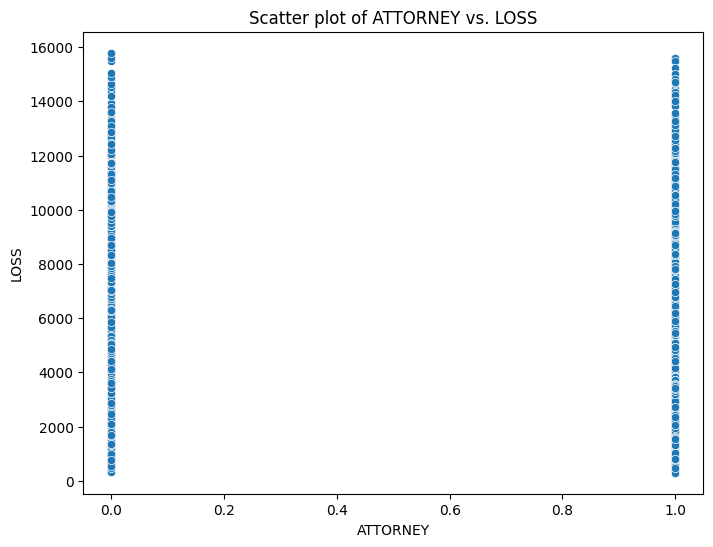

Correlation between ATTORNEY and LOSS: 0.021422055856522328
------------------------------
Bivariate analysis for ATTORNEY vs. Claim_Amount_Requested:


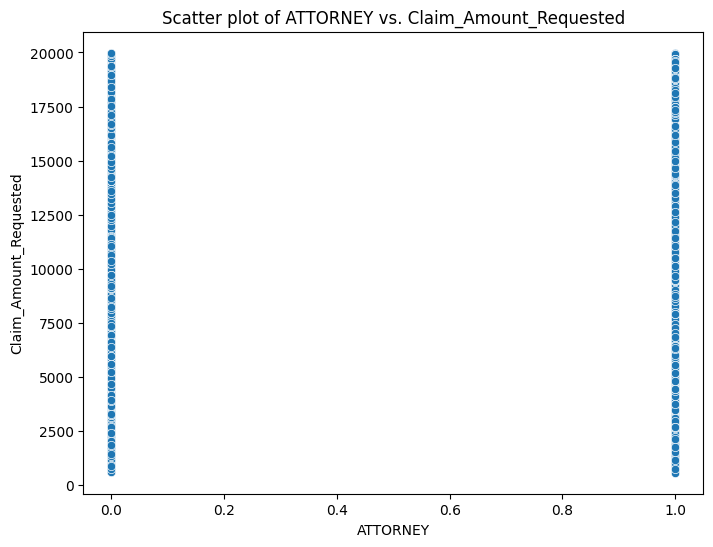

Correlation between ATTORNEY and Claim_Amount_Requested: 0.01107183471707136
------------------------------
Bivariate analysis for ATTORNEY vs. Claim_Approval_Status:


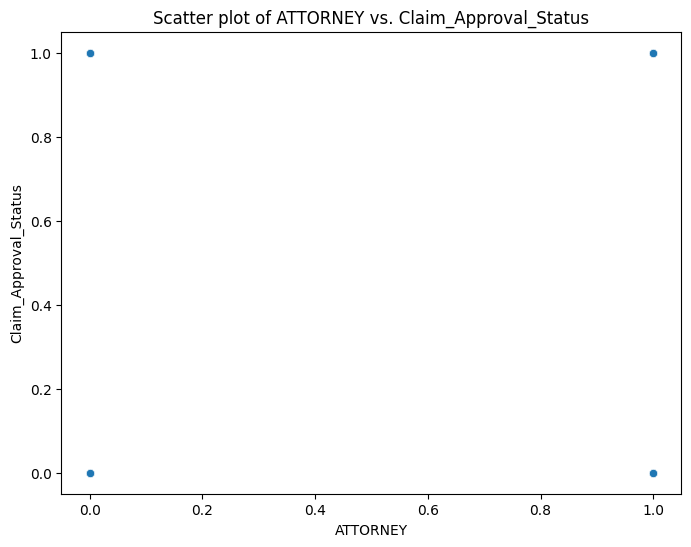

Correlation between ATTORNEY and Claim_Approval_Status: 0.0006243736148646495
------------------------------
Bivariate analysis for ATTORNEY vs. Settlement_Amount:


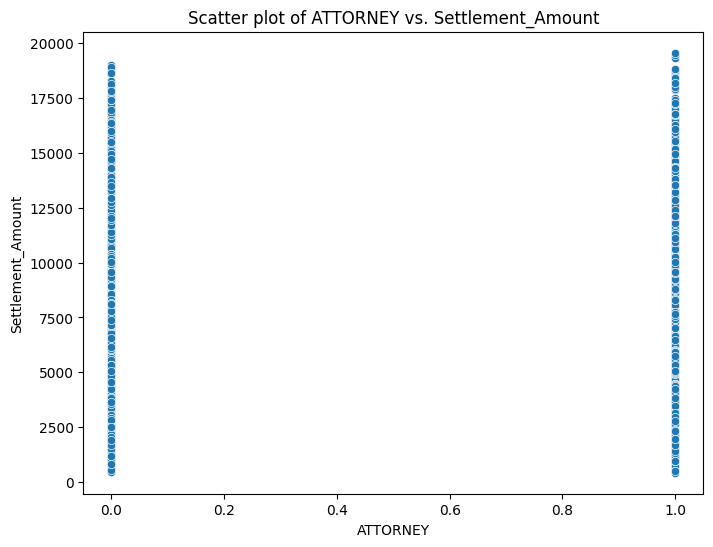

Correlation between ATTORNEY and Settlement_Amount: 0.006962925307159306
------------------------------
Bivariate analysis for CLMSEX vs. ATTORNEY:


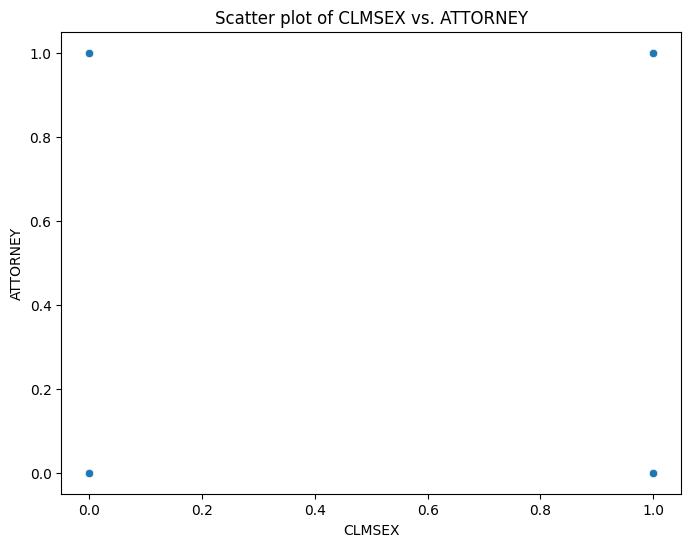

Correlation between CLMSEX and ATTORNEY: 0.07656434729424945
------------------------------
Bivariate analysis for CLMSEX vs. CLMINSUR:


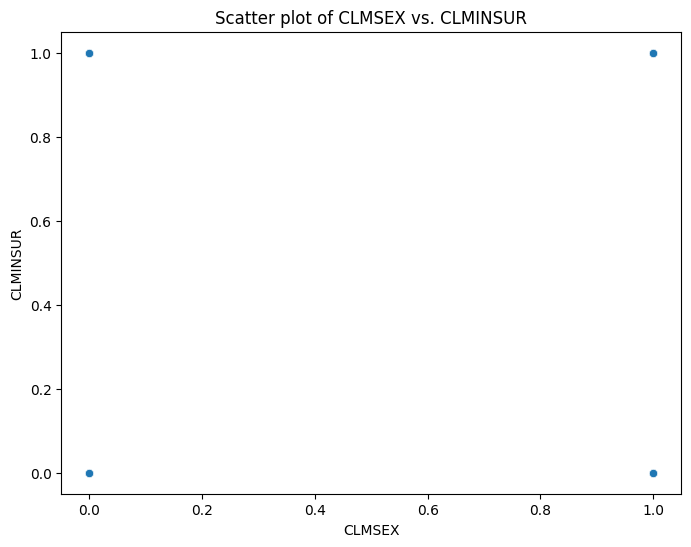

Correlation between CLMSEX and CLMINSUR: 0.06597614517540712
------------------------------
Bivariate analysis for CLMSEX vs. SEATBELT:


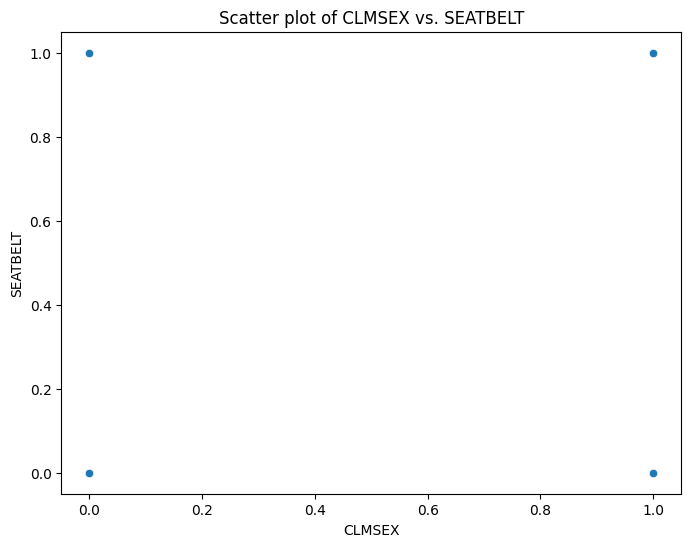

Correlation between CLMSEX and SEATBELT: -0.01632670103964207
------------------------------
Bivariate analysis for CLMSEX vs. LOSS:


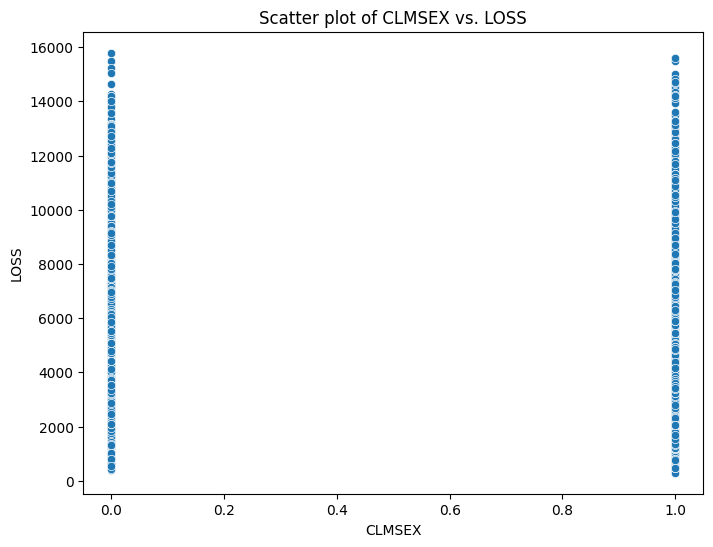

Correlation between CLMSEX and LOSS: 0.0013271803866528214
------------------------------
Bivariate analysis for CLMSEX vs. Claim_Amount_Requested:


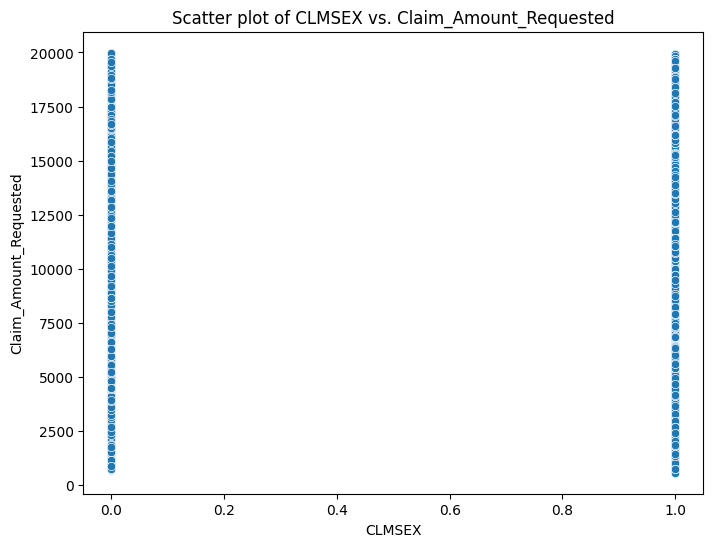

Correlation between CLMSEX and Claim_Amount_Requested: -0.0001685593699580405
------------------------------
Bivariate analysis for CLMSEX vs. Claim_Approval_Status:


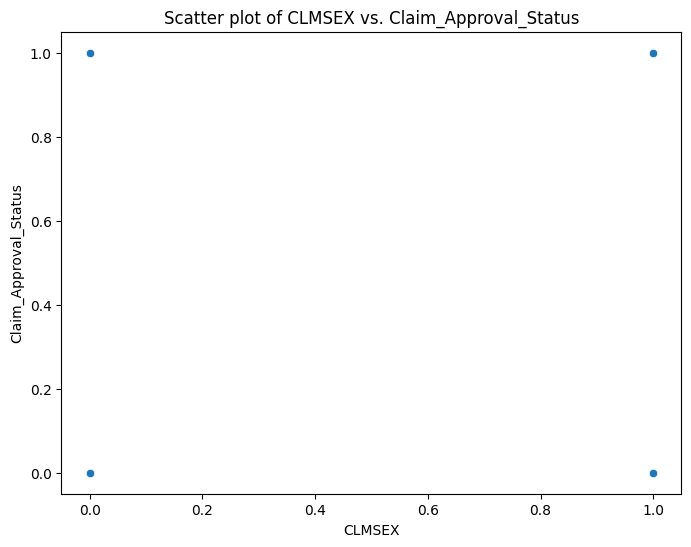

Correlation between CLMSEX and Claim_Approval_Status: -0.03423646604241324
------------------------------
Bivariate analysis for CLMSEX vs. Settlement_Amount:


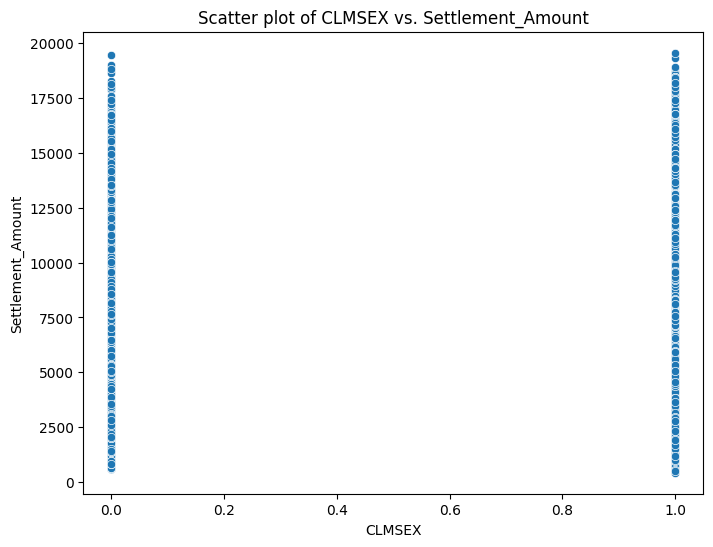

Correlation between CLMSEX and Settlement_Amount: 0.0071012581817192595
------------------------------
Bivariate analysis for CLMINSUR vs. ATTORNEY:


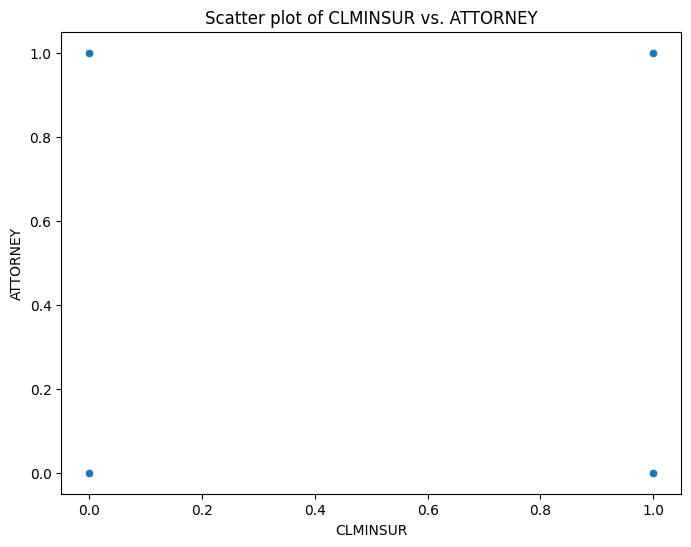

Correlation between CLMINSUR and ATTORNEY: 0.07663109111972204
------------------------------
Bivariate analysis for CLMINSUR vs. CLMSEX:


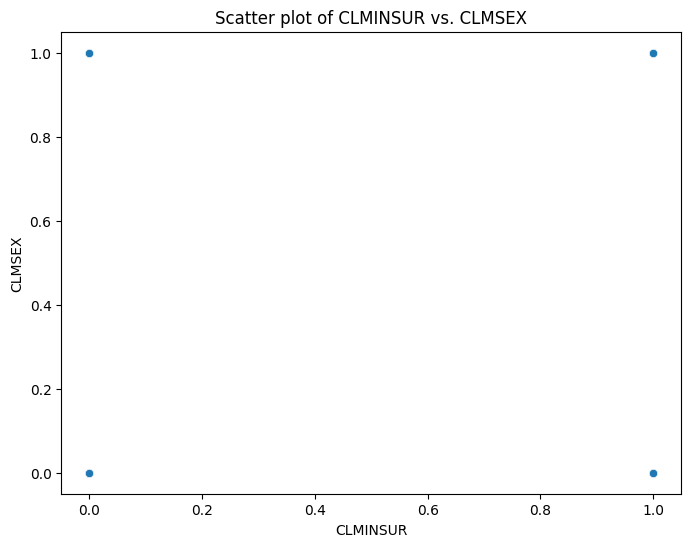

Correlation between CLMINSUR and CLMSEX: 0.06597614517540712
------------------------------
Bivariate analysis for CLMINSUR vs. SEATBELT:


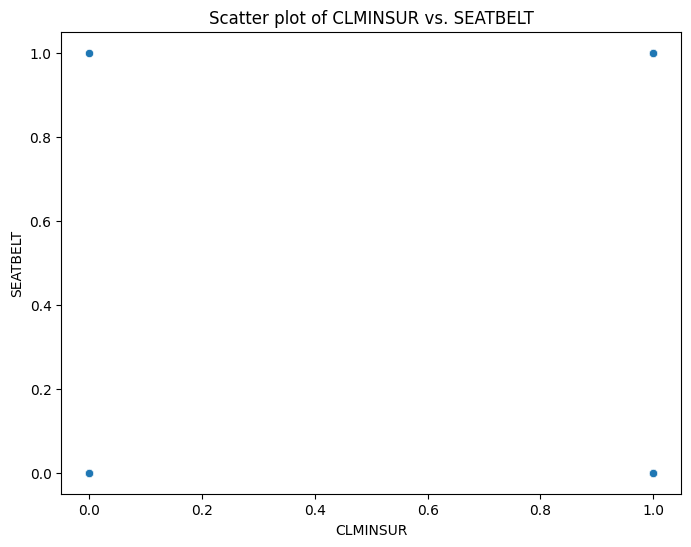

Correlation between CLMINSUR and SEATBELT: 0.019952796280836394
------------------------------
Bivariate analysis for CLMINSUR vs. LOSS:


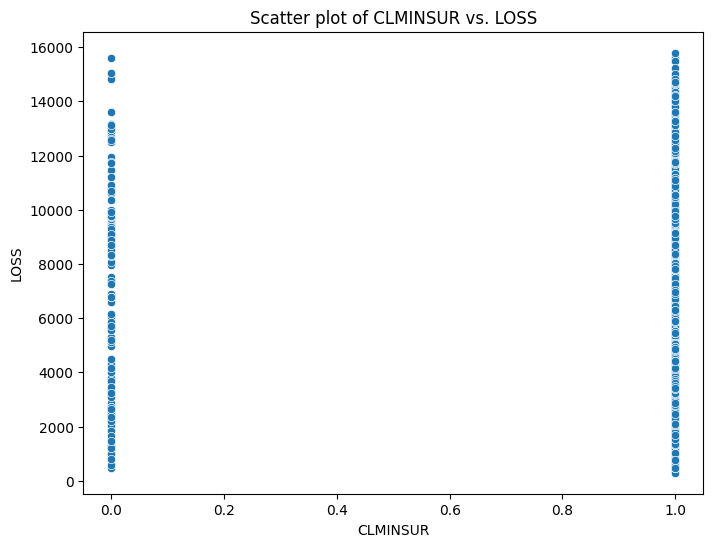

Correlation between CLMINSUR and LOSS: -0.005177355540319915
------------------------------
Bivariate analysis for CLMINSUR vs. Claim_Amount_Requested:


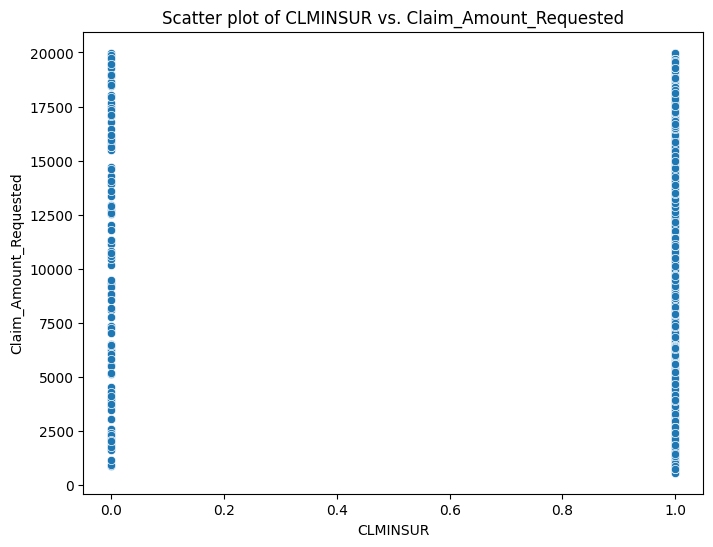

Correlation between CLMINSUR and Claim_Amount_Requested: -0.0027460650860095036
------------------------------
Bivariate analysis for CLMINSUR vs. Claim_Approval_Status:


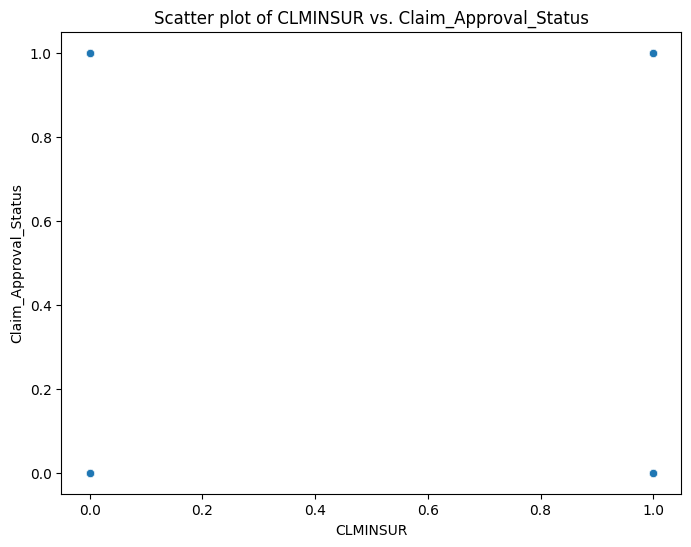

Correlation between CLMINSUR and Claim_Approval_Status: 0.019206446060278545
------------------------------
Bivariate analysis for CLMINSUR vs. Settlement_Amount:


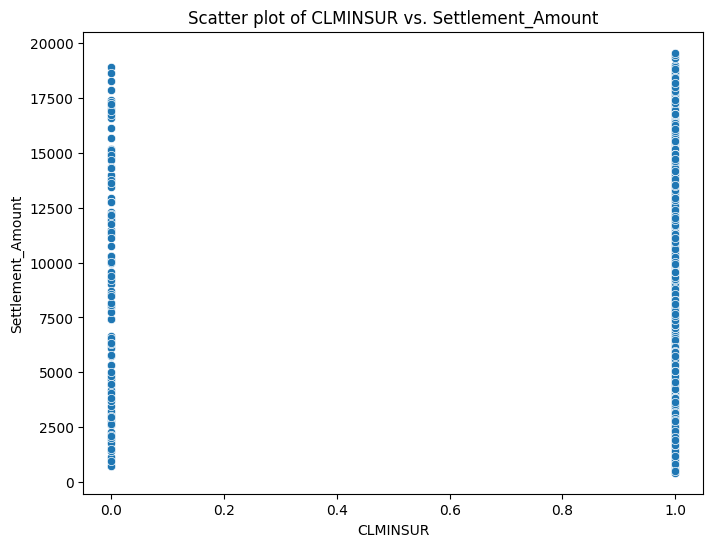

Correlation between CLMINSUR and Settlement_Amount: 0.0020623581699586546
------------------------------
Bivariate analysis for SEATBELT vs. ATTORNEY:


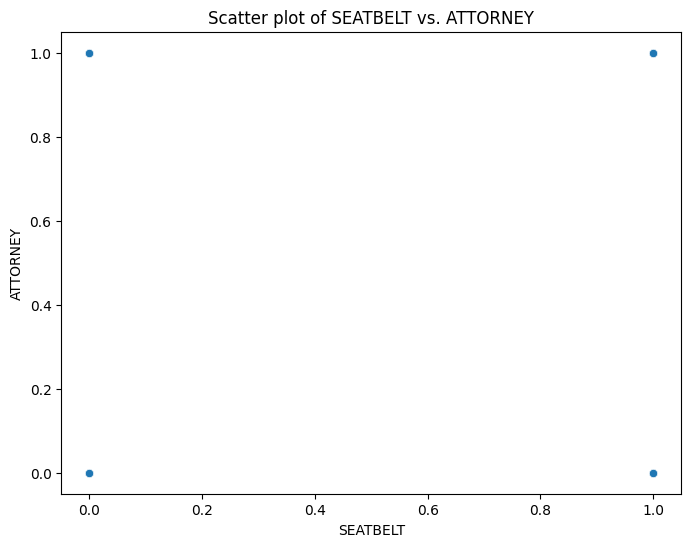

Correlation between SEATBELT and ATTORNEY: -0.0558475918487326
------------------------------
Bivariate analysis for SEATBELT vs. CLMSEX:


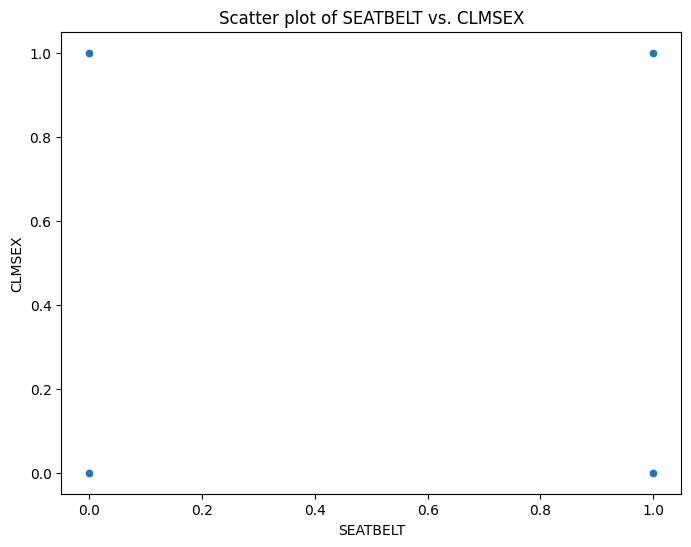

Correlation between SEATBELT and CLMSEX: -0.016326701039642066
------------------------------
Bivariate analysis for SEATBELT vs. CLMINSUR:


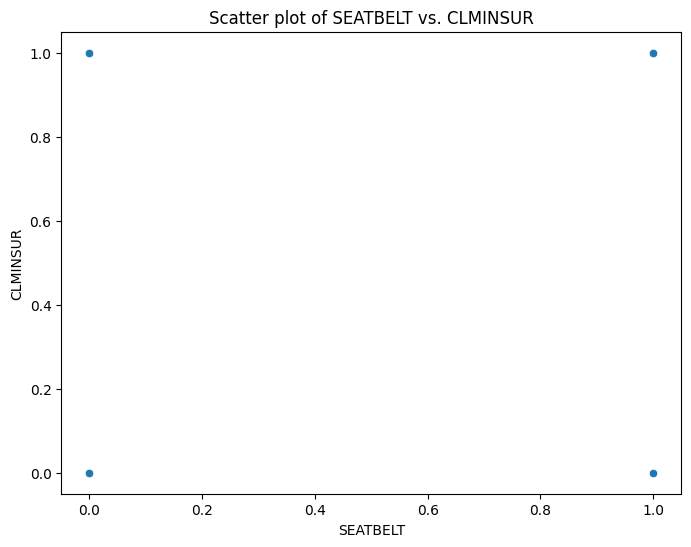

Correlation between SEATBELT and CLMINSUR: 0.019952796280836394
------------------------------
Bivariate analysis for SEATBELT vs. LOSS:


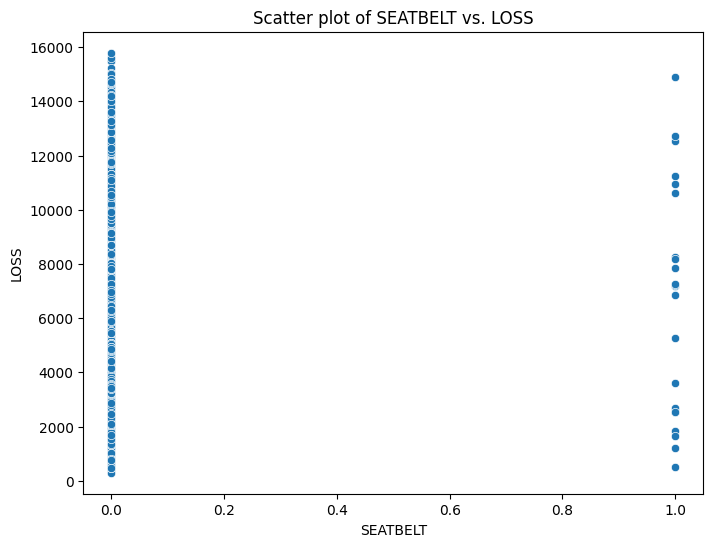

Correlation between SEATBELT and LOSS: 0.0007688235664690781
------------------------------
Bivariate analysis for SEATBELT vs. Claim_Amount_Requested:


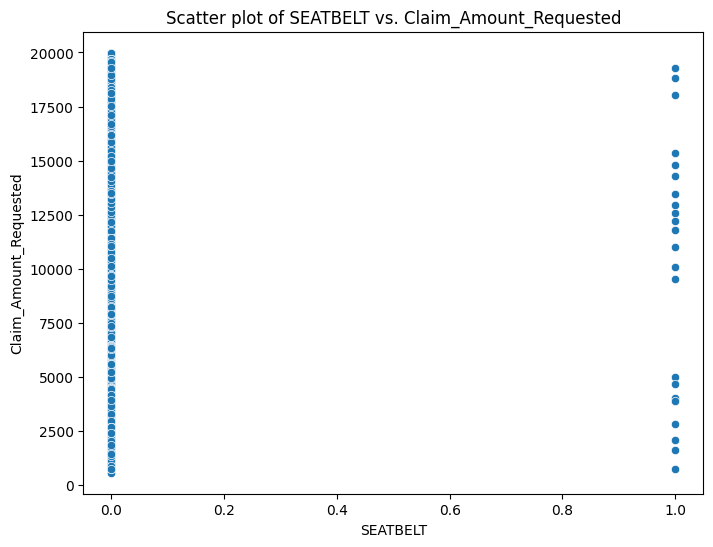

Correlation between SEATBELT and Claim_Amount_Requested: -0.008790646514447095
------------------------------
Bivariate analysis for SEATBELT vs. Claim_Approval_Status:


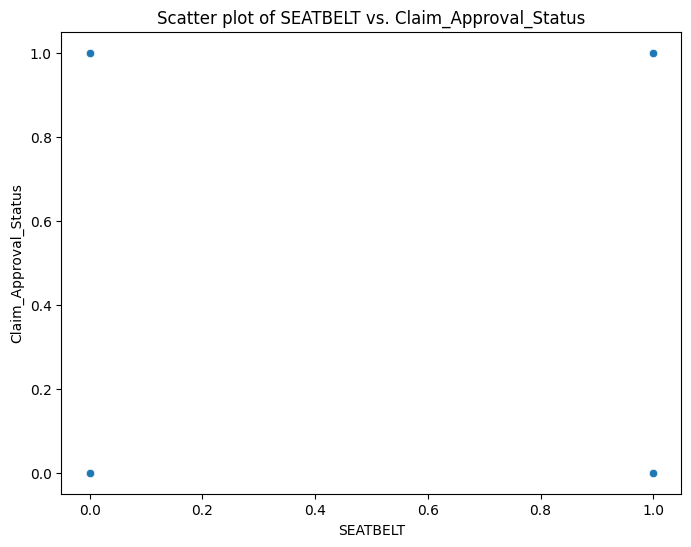

Correlation between SEATBELT and Claim_Approval_Status: -0.018490727888238676
------------------------------
Bivariate analysis for SEATBELT vs. Settlement_Amount:


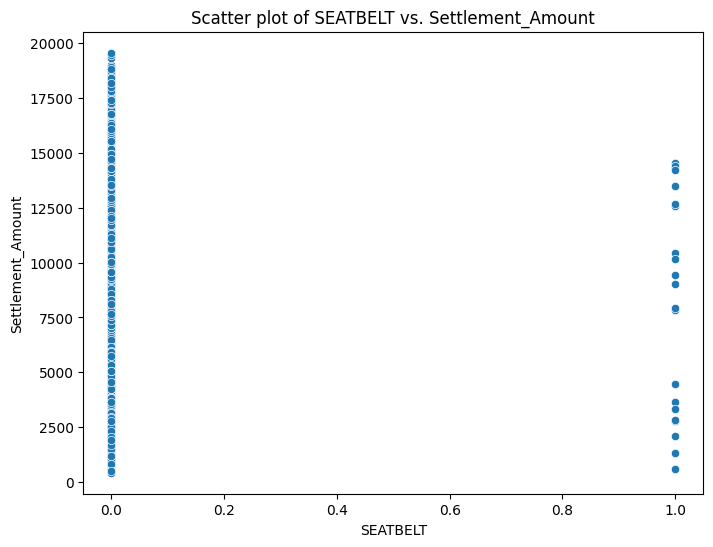

Correlation between SEATBELT and Settlement_Amount: -0.015872955130188993
------------------------------
Bivariate analysis for LOSS vs. ATTORNEY:


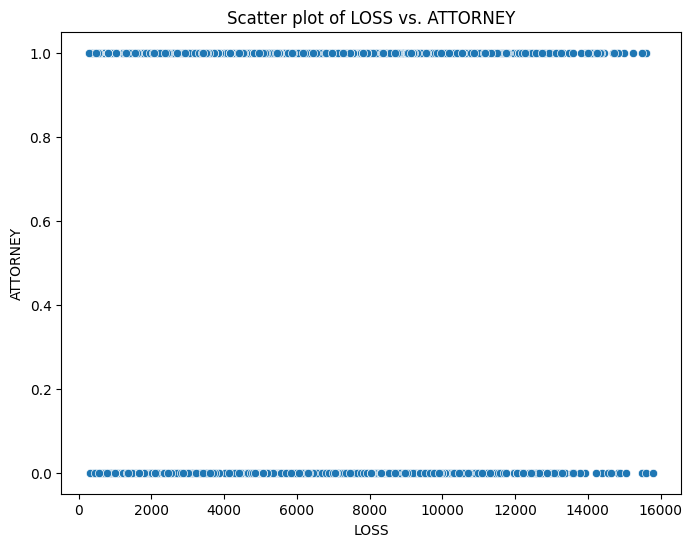

Correlation between LOSS and ATTORNEY: 0.021422055856522328
------------------------------
Bivariate analysis for LOSS vs. CLMSEX:


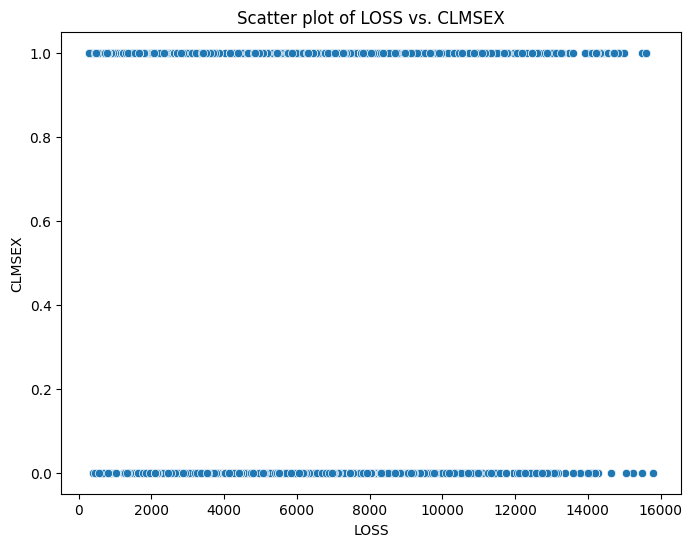

Correlation between LOSS and CLMSEX: 0.0013271803866528214
------------------------------
Bivariate analysis for LOSS vs. CLMINSUR:


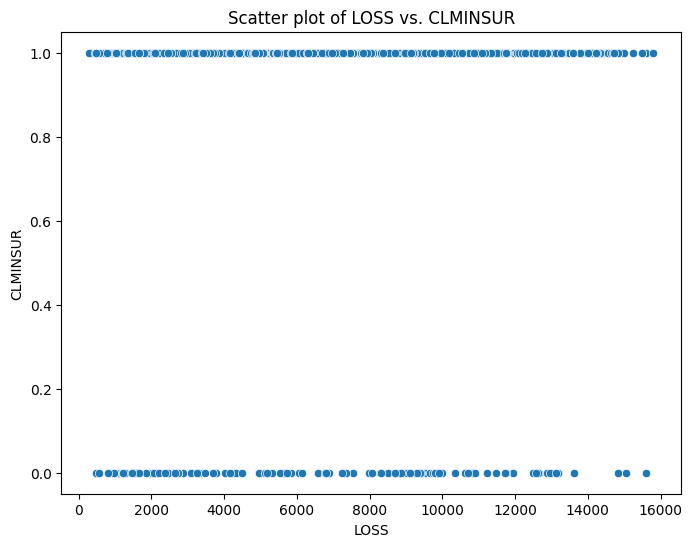

Correlation between LOSS and CLMINSUR: -0.005177355540319915
------------------------------
Bivariate analysis for LOSS vs. SEATBELT:


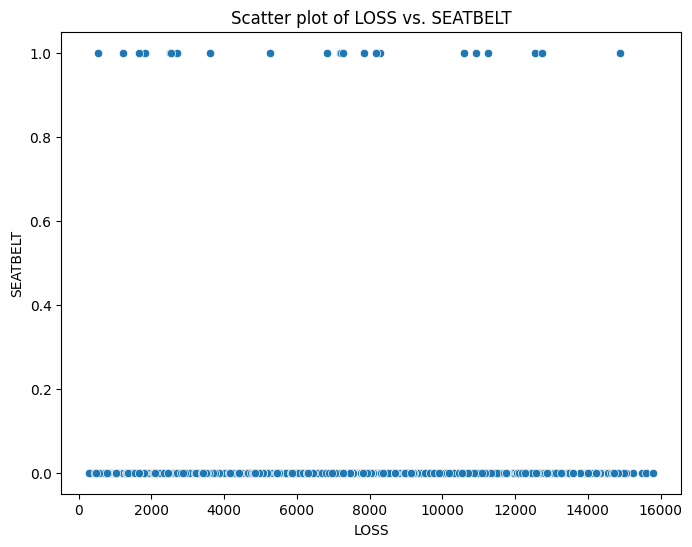

Correlation between LOSS and SEATBELT: 0.0007688235664690782
------------------------------
Bivariate analysis for LOSS vs. Claim_Amount_Requested:


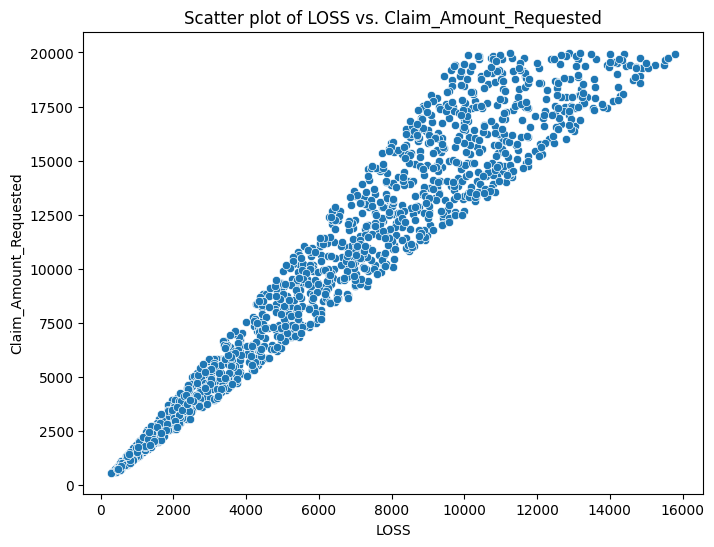

Correlation between LOSS and Claim_Amount_Requested: 0.9613851387460445
------------------------------
Bivariate analysis for LOSS vs. Claim_Approval_Status:


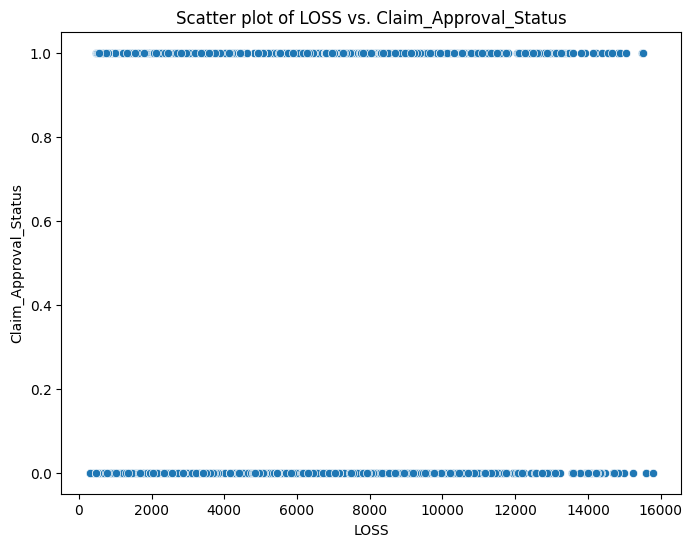

Correlation between LOSS and Claim_Approval_Status: 0.054232264964293925
------------------------------
Bivariate analysis for LOSS vs. Settlement_Amount:


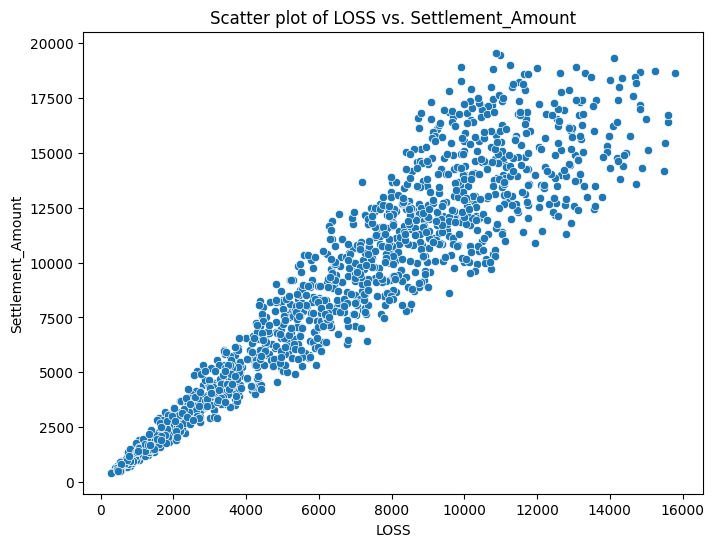

Correlation between LOSS and Settlement_Amount: 0.9407185288443186
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. ATTORNEY:


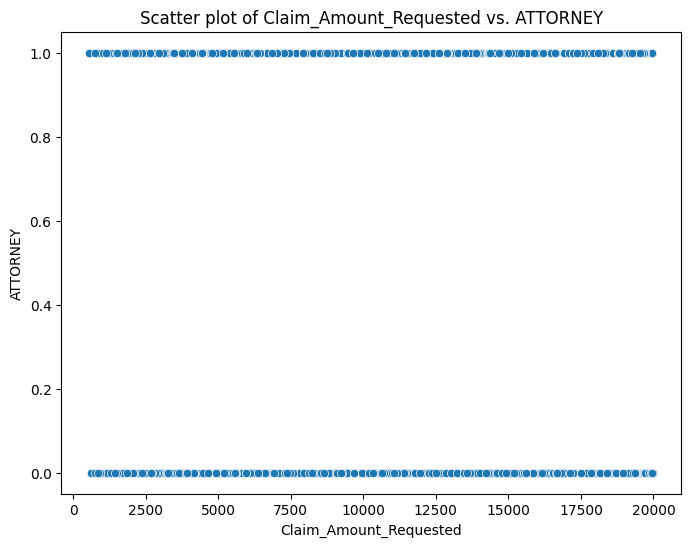

Correlation between Claim_Amount_Requested and ATTORNEY: 0.01107183471707136
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. CLMSEX:


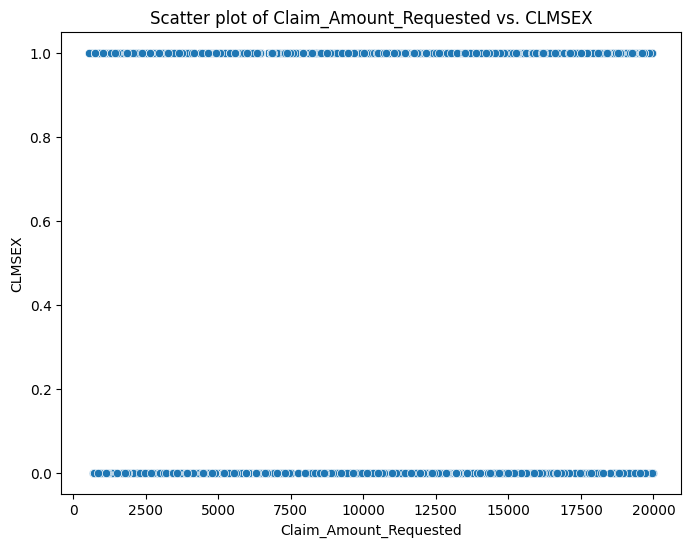

Correlation between Claim_Amount_Requested and CLMSEX: -0.0001685593699580405
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. CLMINSUR:


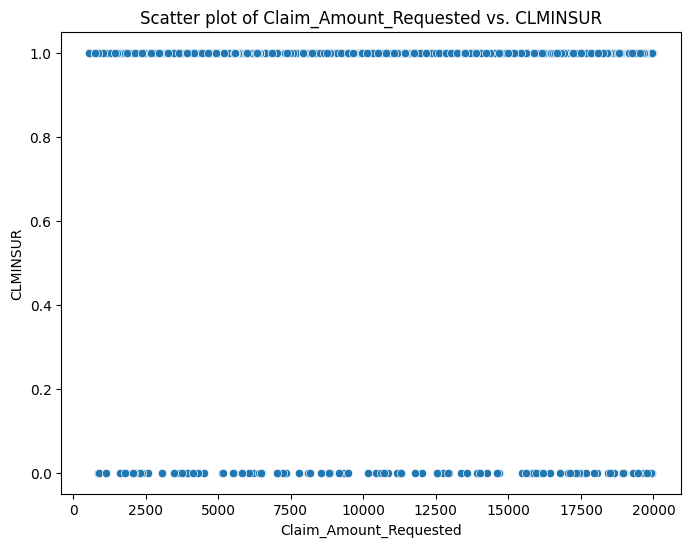

Correlation between Claim_Amount_Requested and CLMINSUR: -0.002746065086009504
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. SEATBELT:


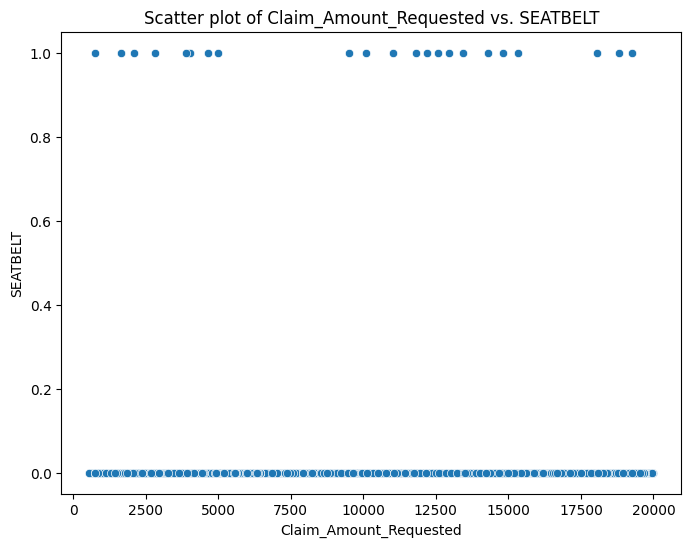

Correlation between Claim_Amount_Requested and SEATBELT: -0.008790646514447093
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. LOSS:


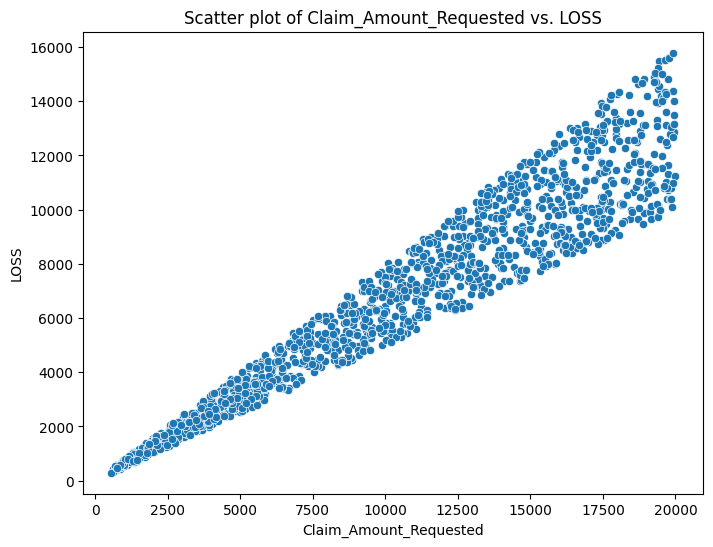

Correlation between Claim_Amount_Requested and LOSS: 0.9613851387460445
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. Claim_Approval_Status:


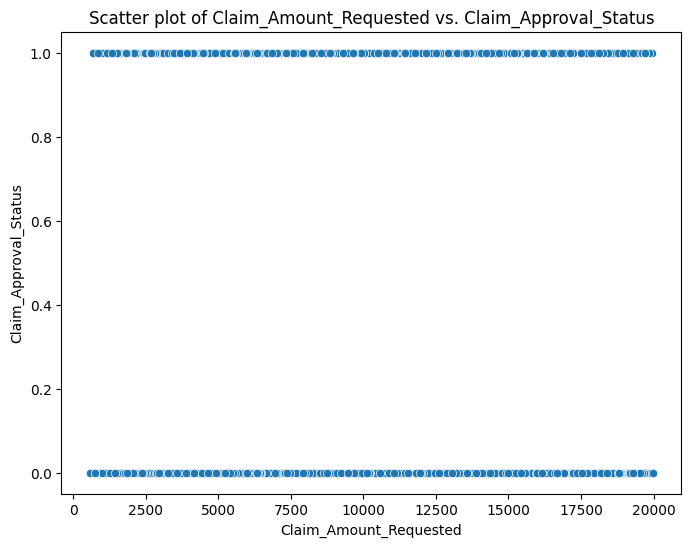

Correlation between Claim_Amount_Requested and Claim_Approval_Status: 0.054362463274214574
------------------------------
Bivariate analysis for Claim_Amount_Requested vs. Settlement_Amount:


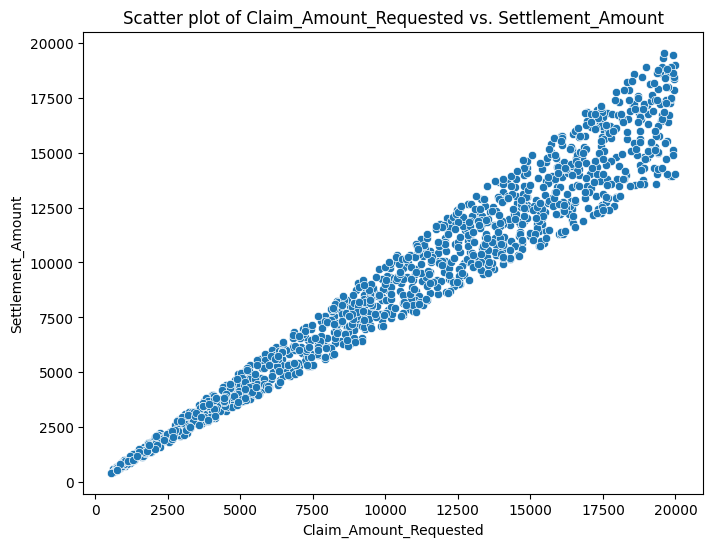

Correlation between Claim_Amount_Requested and Settlement_Amount: 0.9789931999186752
------------------------------
Bivariate analysis for Claim_Approval_Status vs. ATTORNEY:


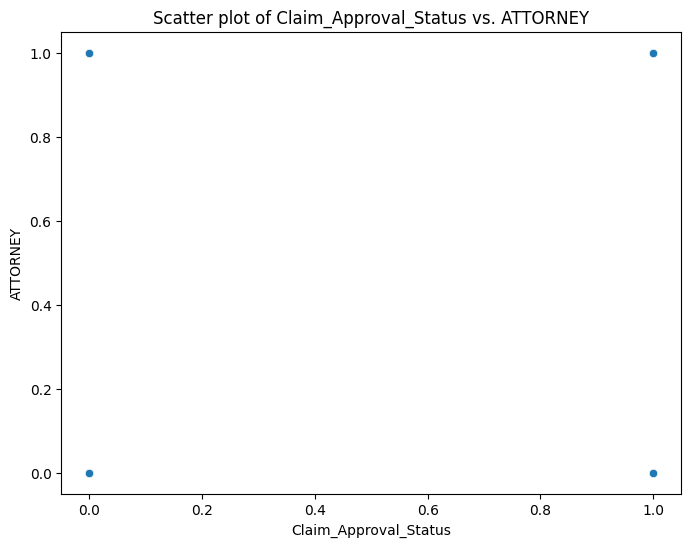

Correlation between Claim_Approval_Status and ATTORNEY: 0.0006243736148646494
------------------------------
Bivariate analysis for Claim_Approval_Status vs. CLMSEX:


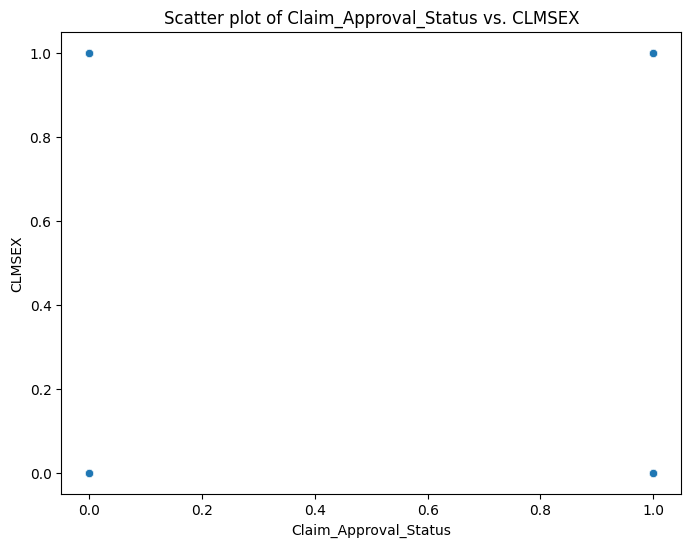

Correlation between Claim_Approval_Status and CLMSEX: -0.03423646604241324
------------------------------
Bivariate analysis for Claim_Approval_Status vs. CLMINSUR:


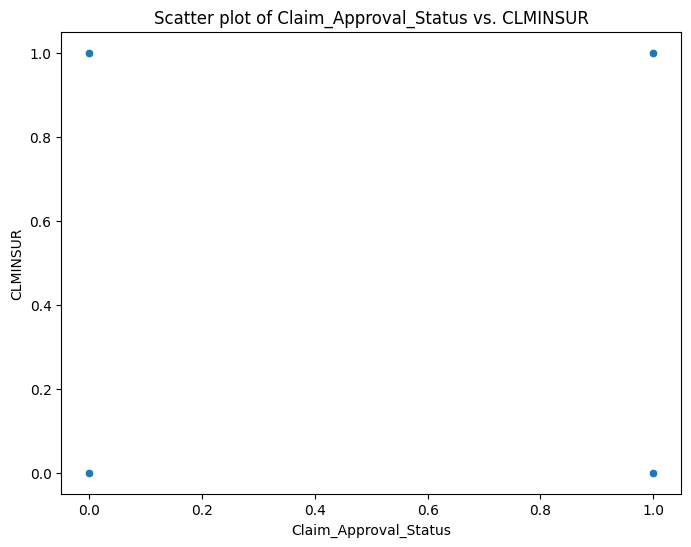

Correlation between Claim_Approval_Status and CLMINSUR: 0.019206446060278545
------------------------------
Bivariate analysis for Claim_Approval_Status vs. SEATBELT:


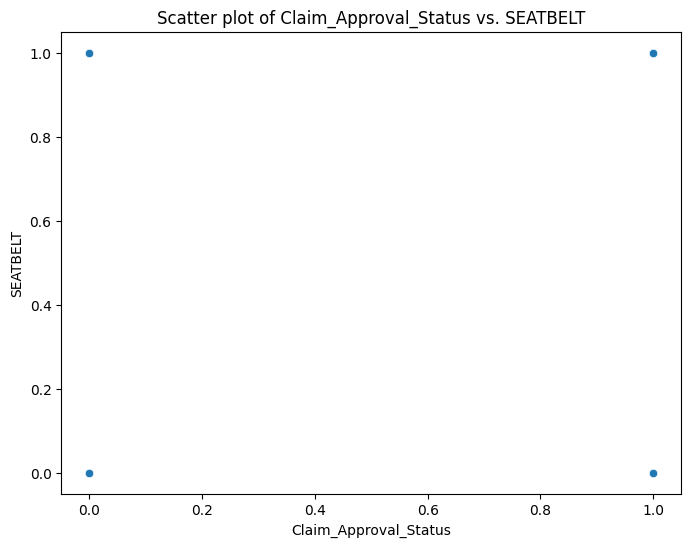

Correlation between Claim_Approval_Status and SEATBELT: -0.018490727888238676
------------------------------
Bivariate analysis for Claim_Approval_Status vs. LOSS:


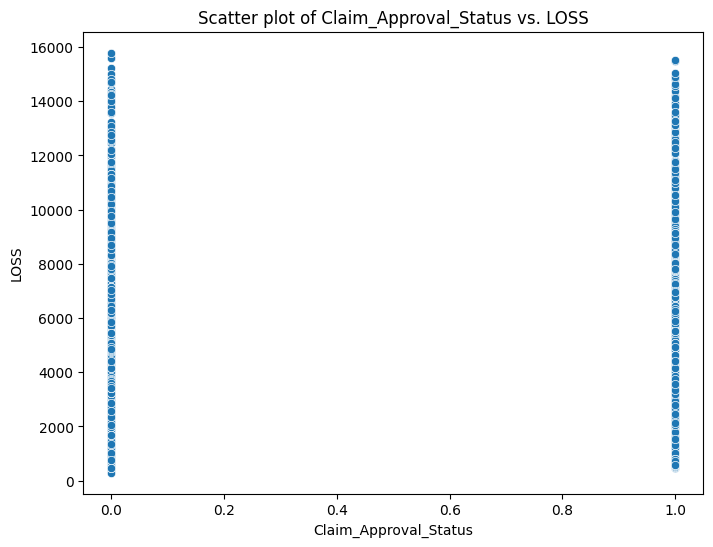

Correlation between Claim_Approval_Status and LOSS: 0.054232264964293925
------------------------------
Bivariate analysis for Claim_Approval_Status vs. Claim_Amount_Requested:


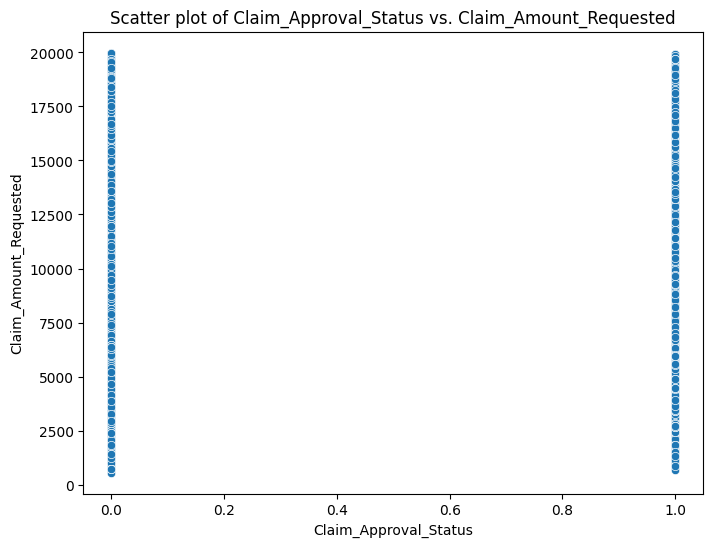

Correlation between Claim_Approval_Status and Claim_Amount_Requested: 0.054362463274214574
------------------------------
Bivariate analysis for Claim_Approval_Status vs. Settlement_Amount:


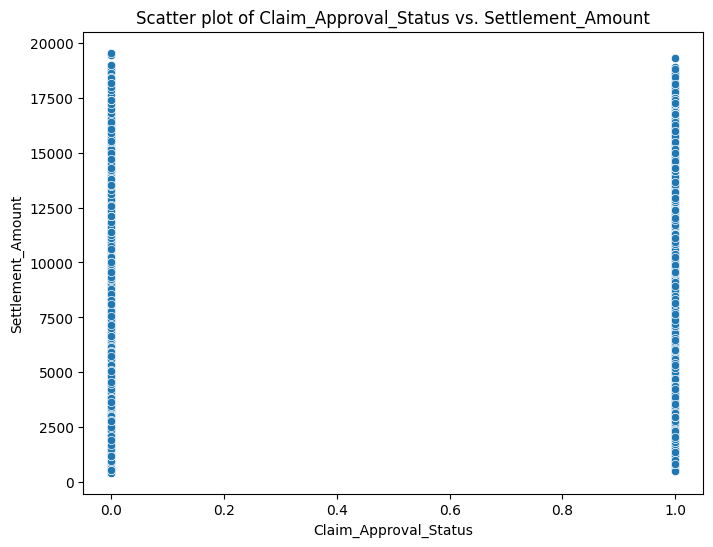

Correlation between Claim_Approval_Status and Settlement_Amount: 0.05031647114109605
------------------------------
Bivariate analysis for Settlement_Amount vs. ATTORNEY:


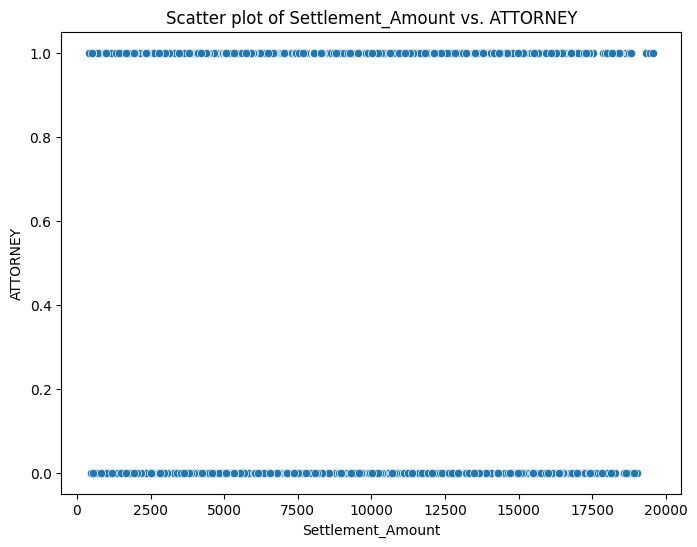

Correlation between Settlement_Amount and ATTORNEY: 0.006962925307159307
------------------------------
Bivariate analysis for Settlement_Amount vs. CLMSEX:


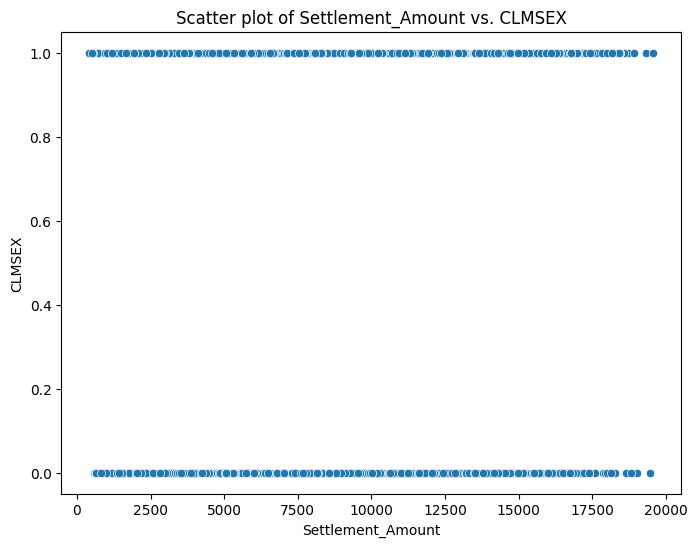

Correlation between Settlement_Amount and CLMSEX: 0.0071012581817192595
------------------------------
Bivariate analysis for Settlement_Amount vs. CLMINSUR:


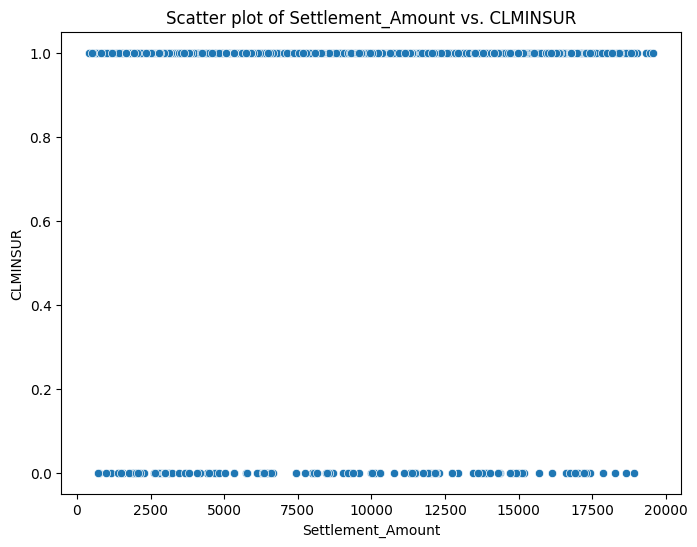

Correlation between Settlement_Amount and CLMINSUR: 0.0020623581699586546
------------------------------
Bivariate analysis for Settlement_Amount vs. SEATBELT:


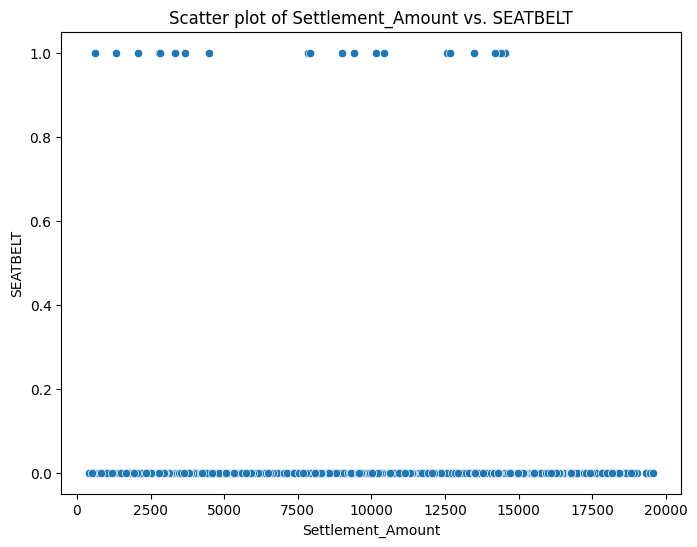

Correlation between Settlement_Amount and SEATBELT: -0.01587295513018899
------------------------------
Bivariate analysis for Settlement_Amount vs. LOSS:


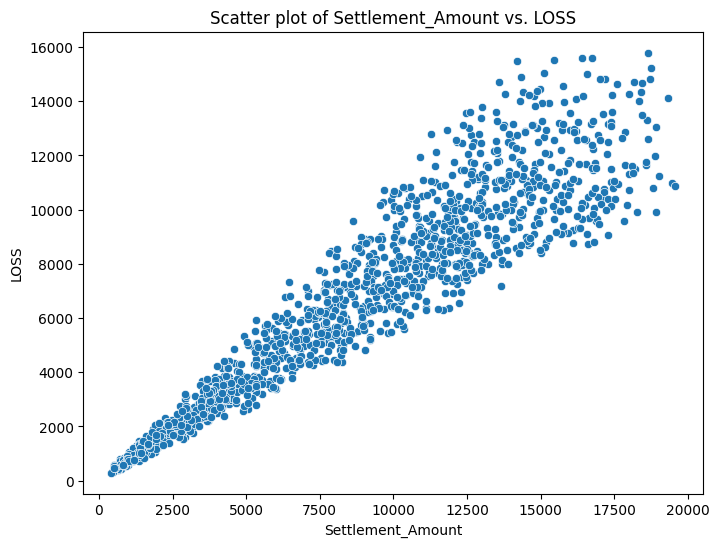

Correlation between Settlement_Amount and LOSS: 0.9407185288443187
------------------------------
Bivariate analysis for Settlement_Amount vs. Claim_Amount_Requested:


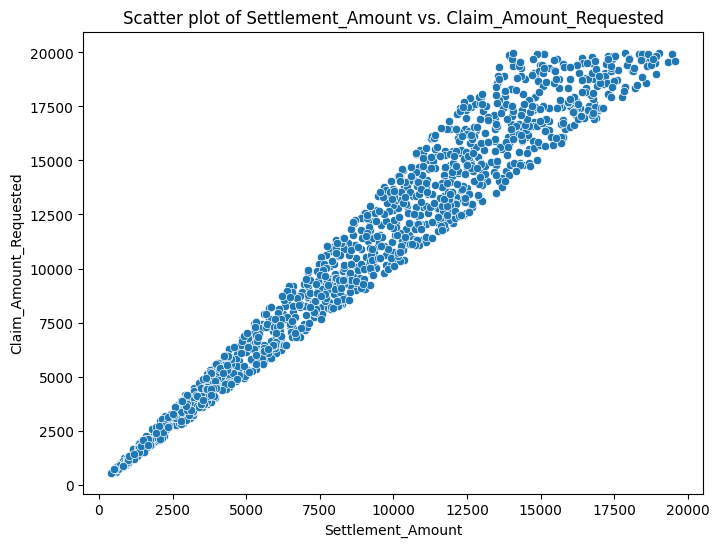

Correlation between Settlement_Amount and Claim_Amount_Requested: 0.9789931999186753
------------------------------
Bivariate analysis for Settlement_Amount vs. Claim_Approval_Status:


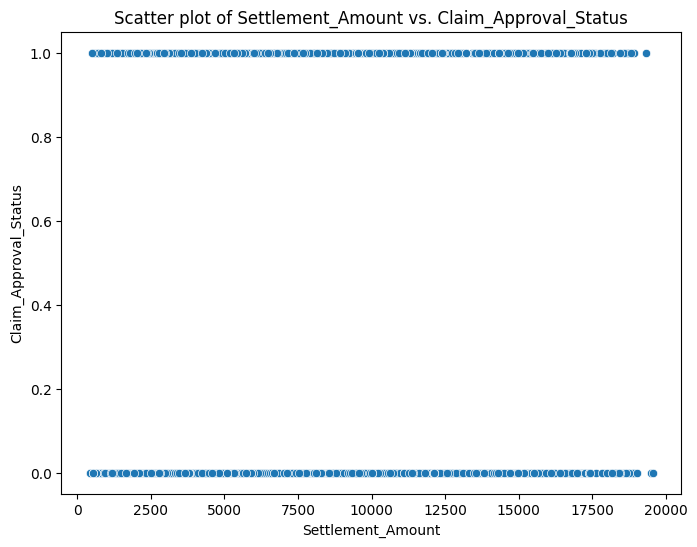

Correlation between Settlement_Amount and Claim_Approval_Status: 0.05031647114109605
------------------------------
Bivariate analysis for Accident_Severity vs. ATTORNEY:


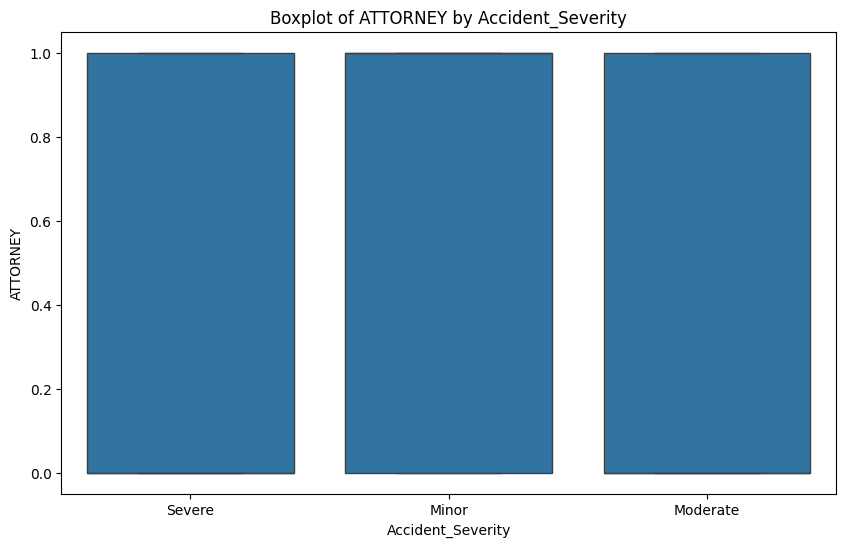

------------------------------
Bivariate analysis for Accident_Severity vs. CLMSEX:


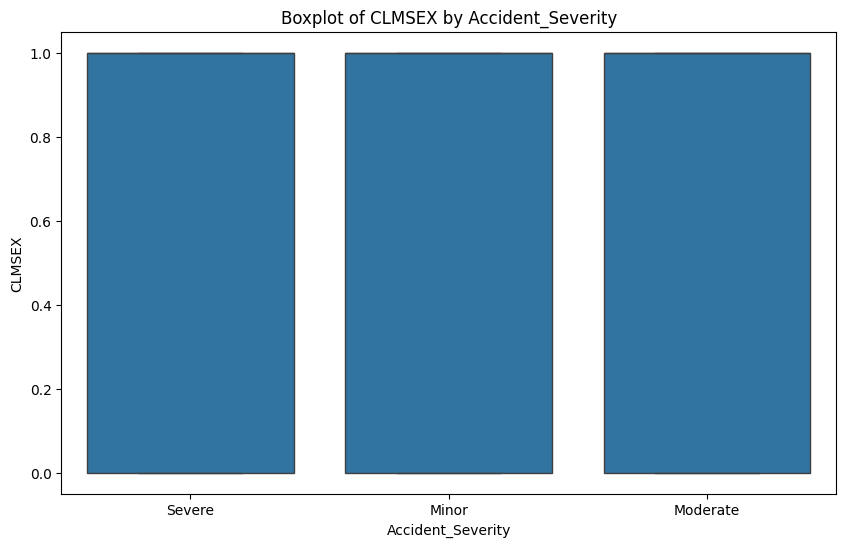

------------------------------
Bivariate analysis for Accident_Severity vs. CLMINSUR:


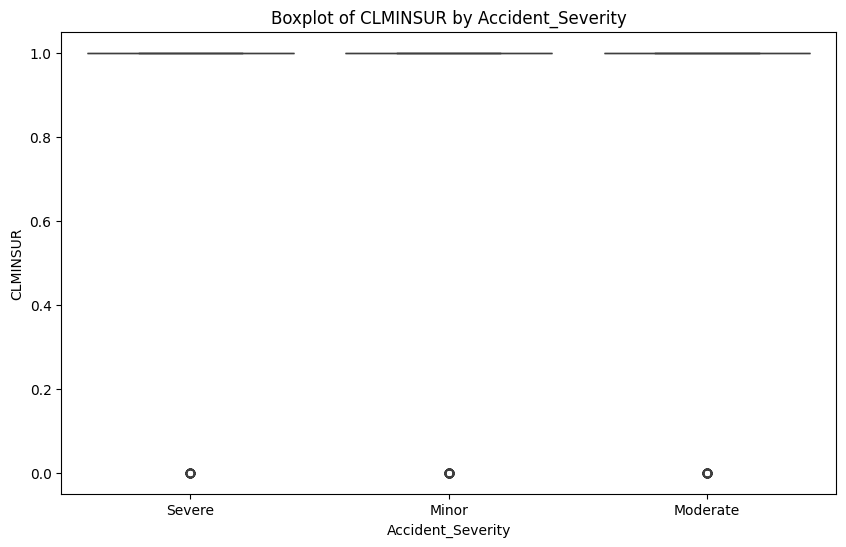

------------------------------
Bivariate analysis for Accident_Severity vs. SEATBELT:


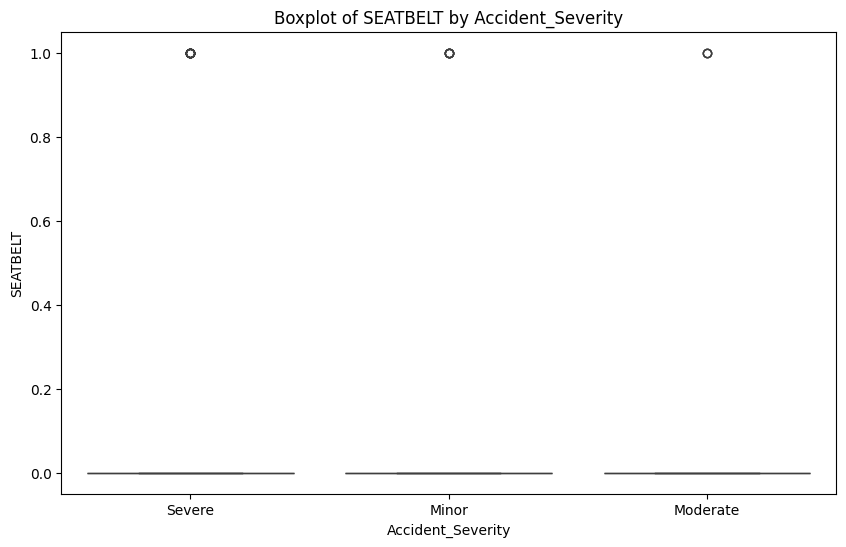

------------------------------
Bivariate analysis for Accident_Severity vs. LOSS:


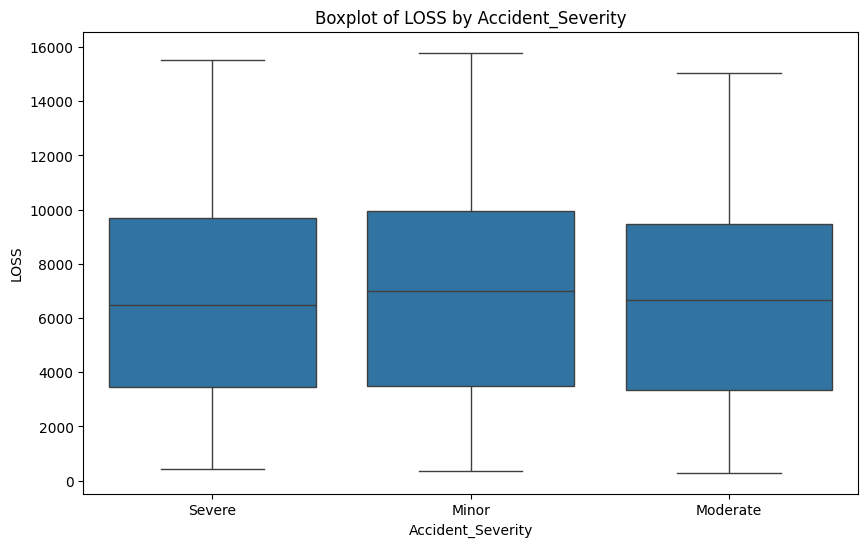

------------------------------
Bivariate analysis for Accident_Severity vs. Claim_Amount_Requested:


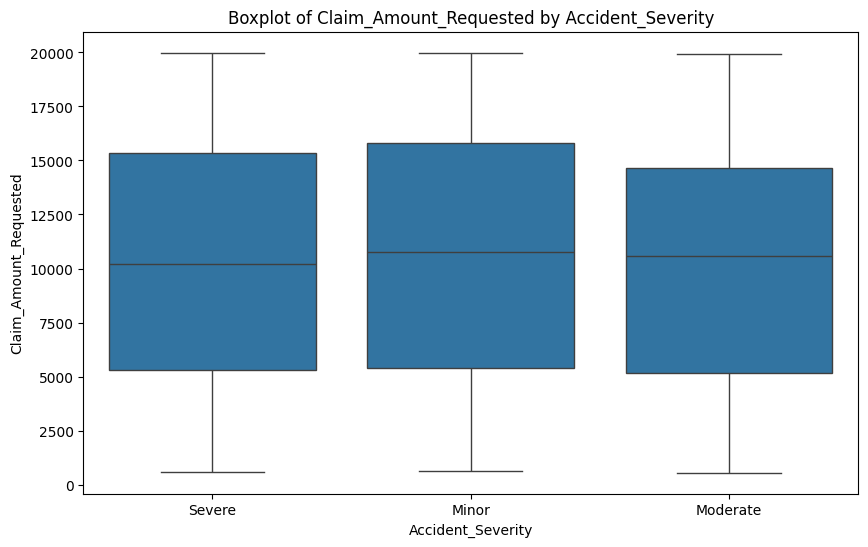

------------------------------
Bivariate analysis for Accident_Severity vs. Claim_Approval_Status:


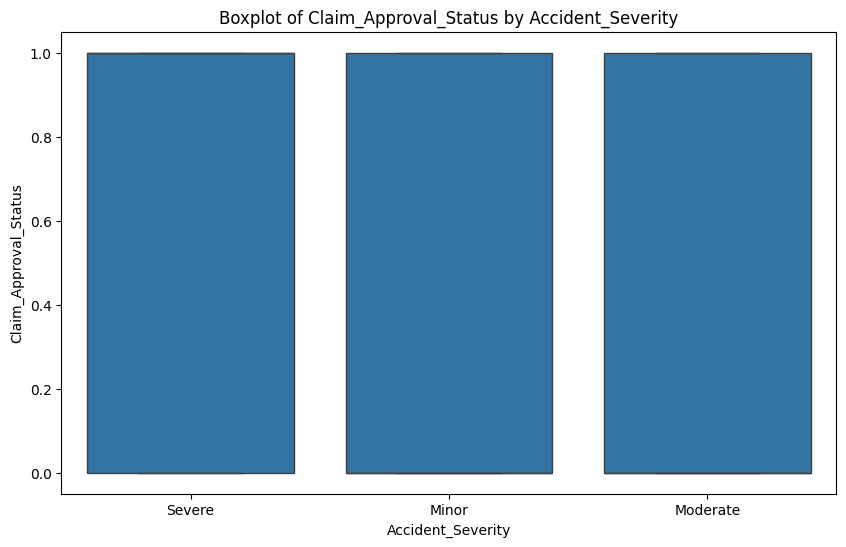

------------------------------
Bivariate analysis for Accident_Severity vs. Settlement_Amount:


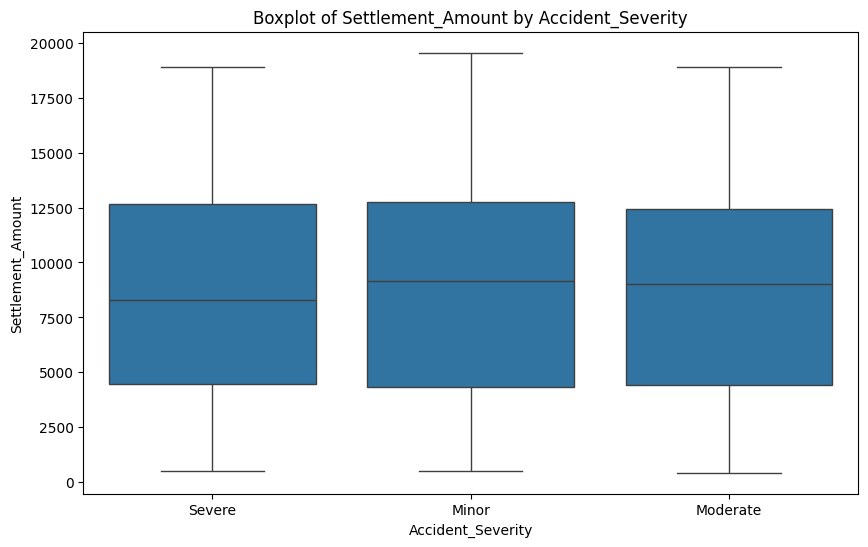

------------------------------
Bivariate analysis for Policy_Type vs. ATTORNEY:


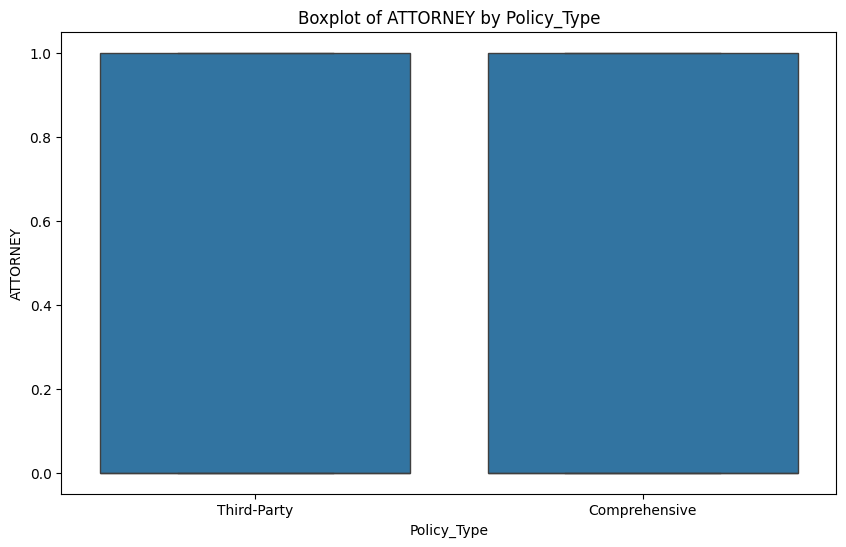

------------------------------
Bivariate analysis for Policy_Type vs. CLMSEX:


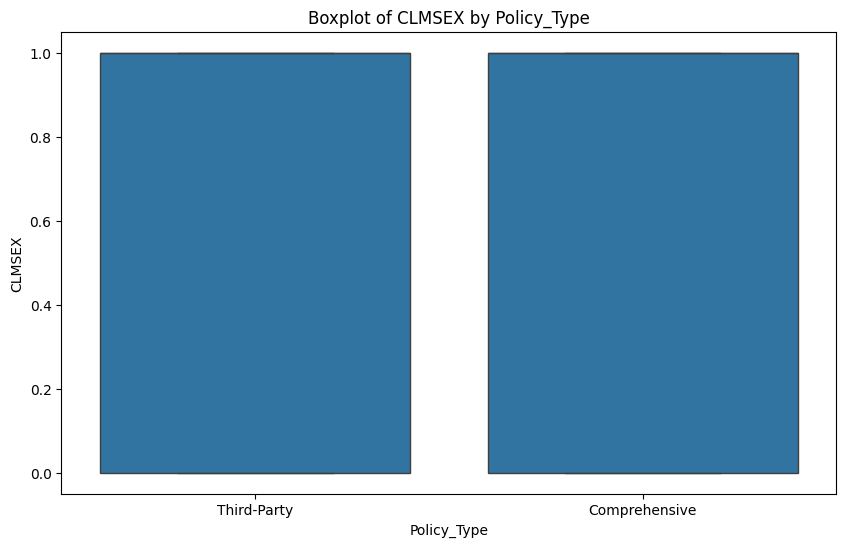

------------------------------
Bivariate analysis for Policy_Type vs. CLMINSUR:


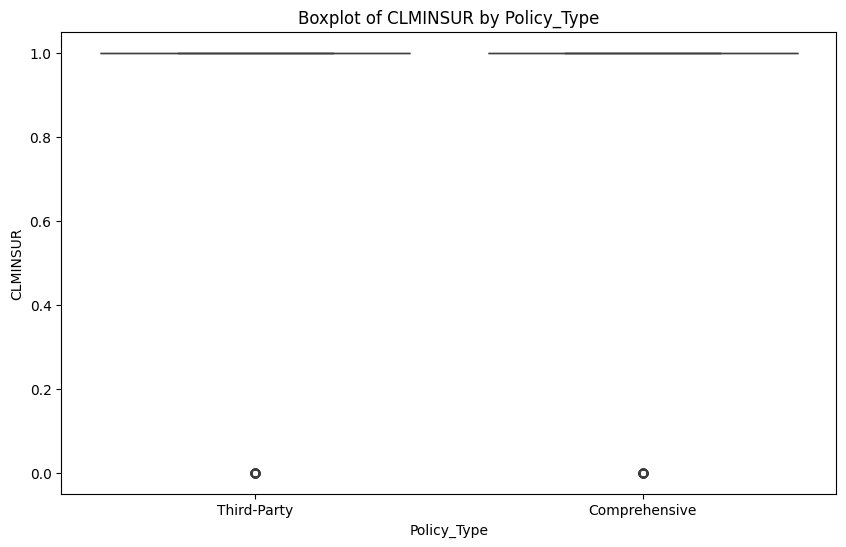

------------------------------
Bivariate analysis for Policy_Type vs. SEATBELT:


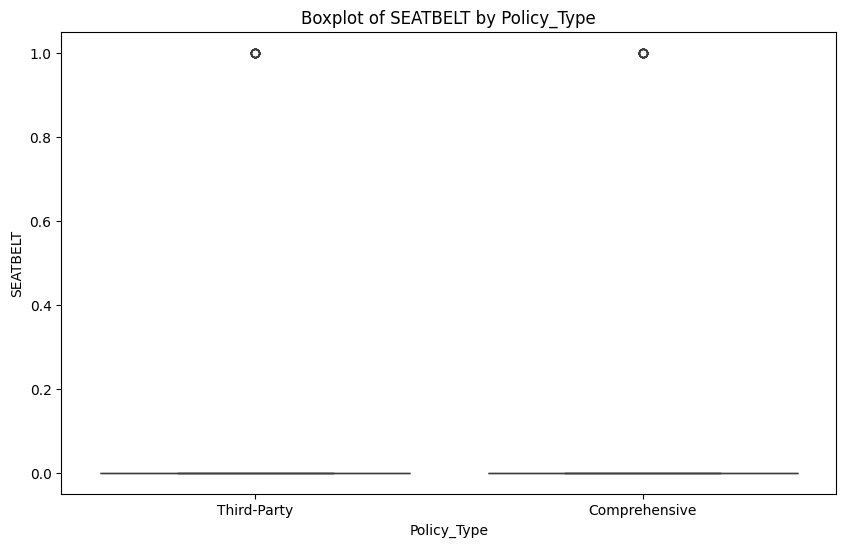

------------------------------
Bivariate analysis for Policy_Type vs. LOSS:


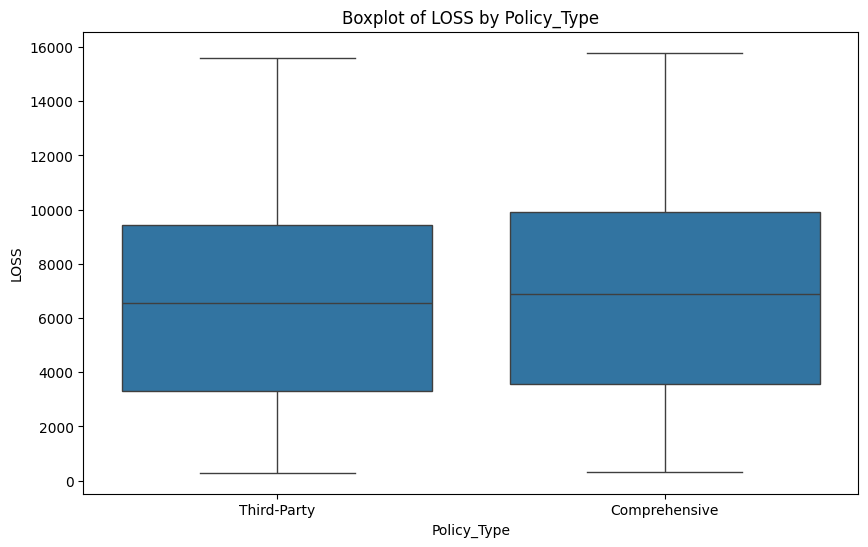

------------------------------
Bivariate analysis for Policy_Type vs. Claim_Amount_Requested:


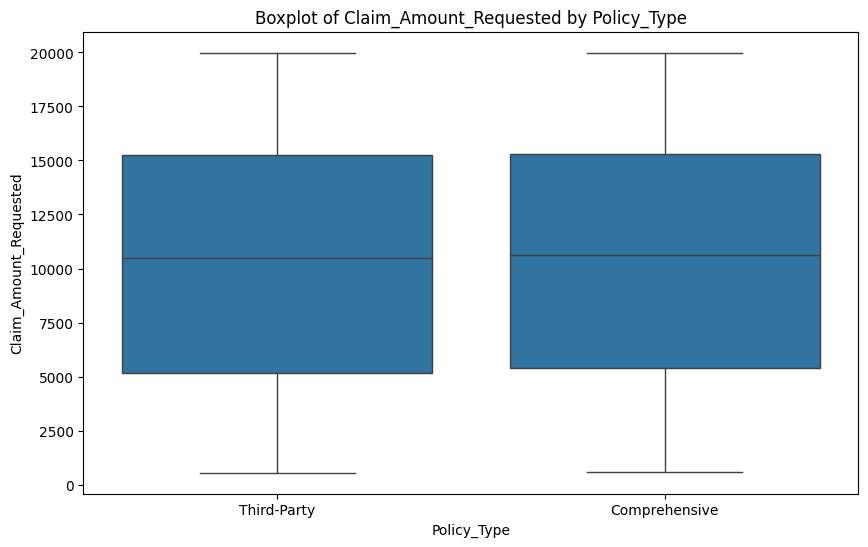

------------------------------
Bivariate analysis for Policy_Type vs. Claim_Approval_Status:


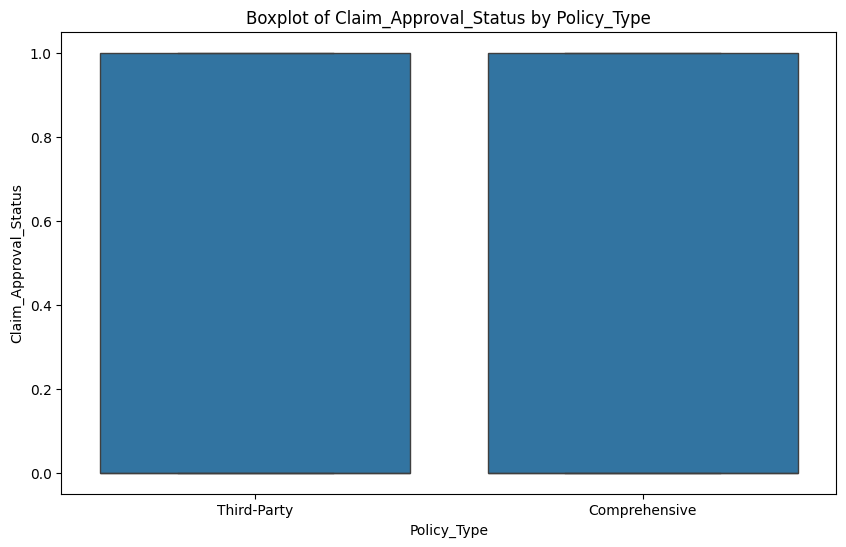

------------------------------
Bivariate analysis for Policy_Type vs. Settlement_Amount:


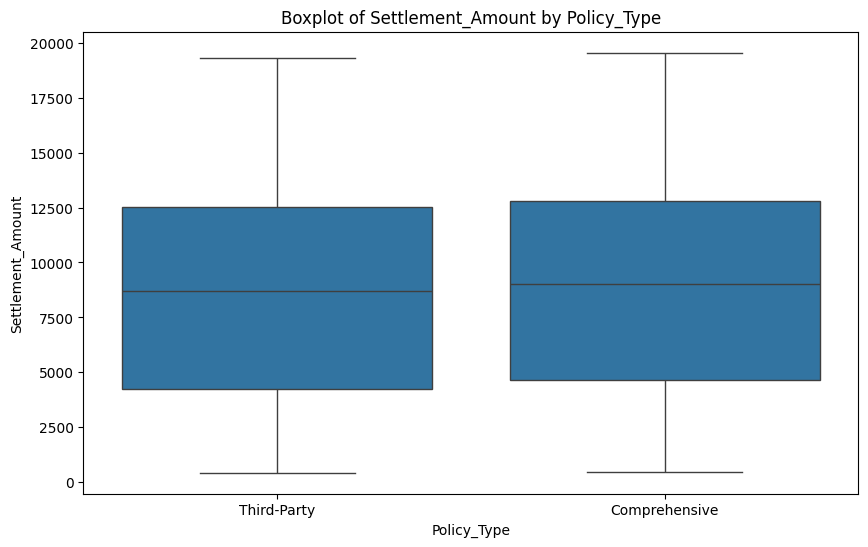

------------------------------
Bivariate analysis for Driving_Record vs. ATTORNEY:


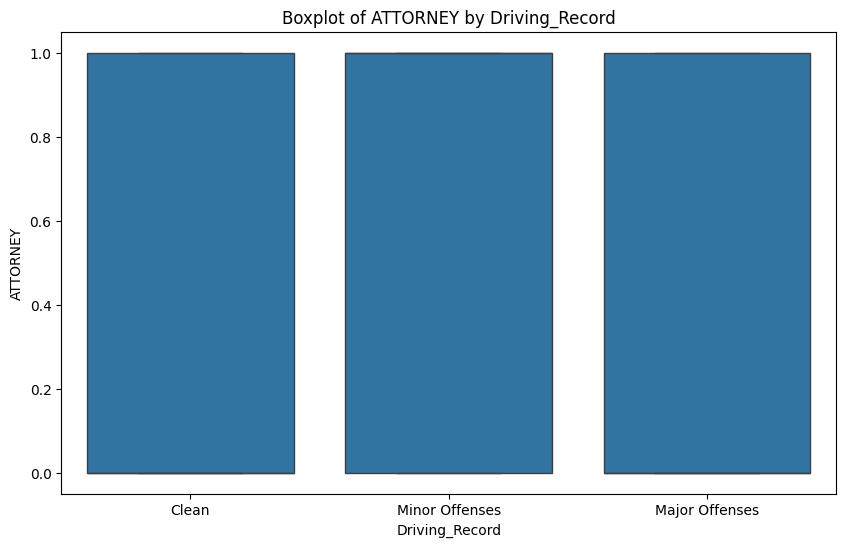

------------------------------
Bivariate analysis for Driving_Record vs. CLMSEX:


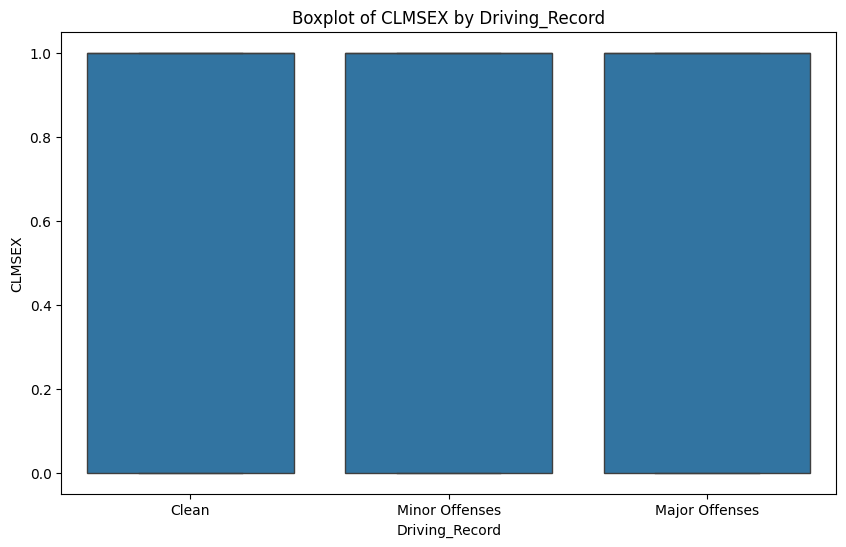

------------------------------
Bivariate analysis for Driving_Record vs. CLMINSUR:


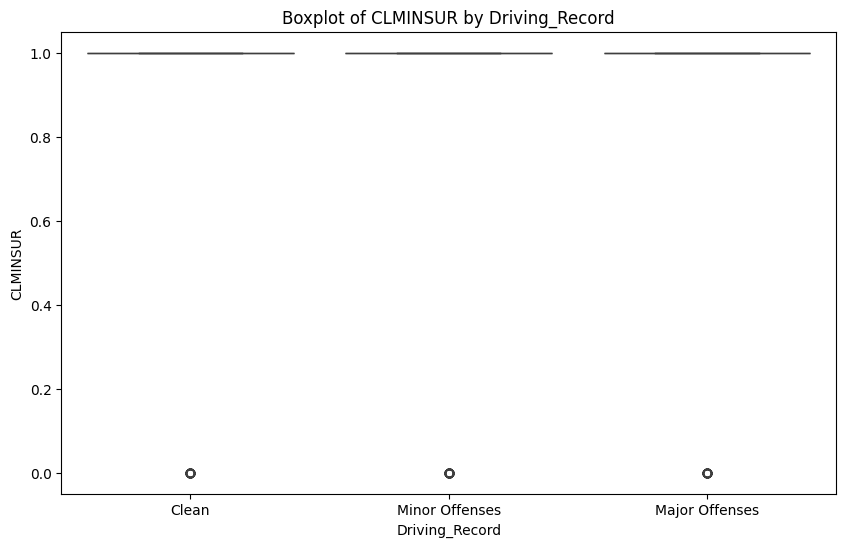

------------------------------
Bivariate analysis for Driving_Record vs. SEATBELT:


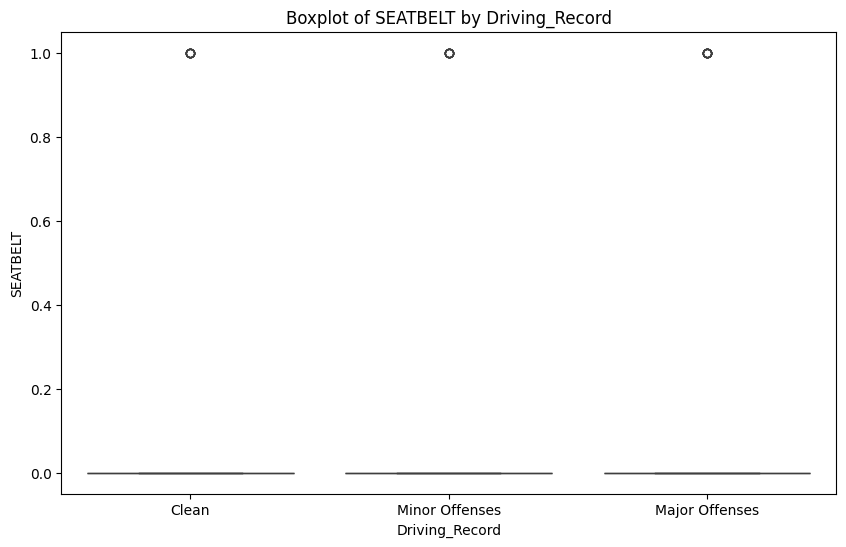

------------------------------
Bivariate analysis for Driving_Record vs. LOSS:


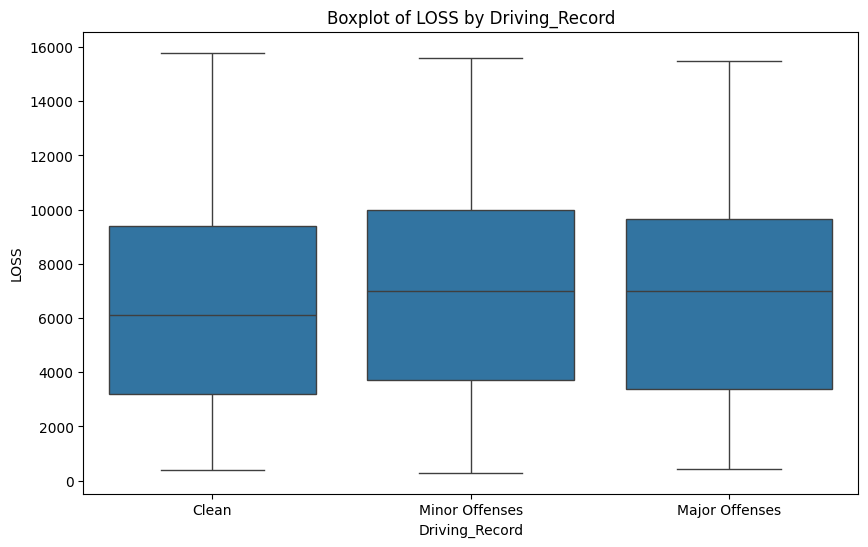

------------------------------
Bivariate analysis for Driving_Record vs. Claim_Amount_Requested:


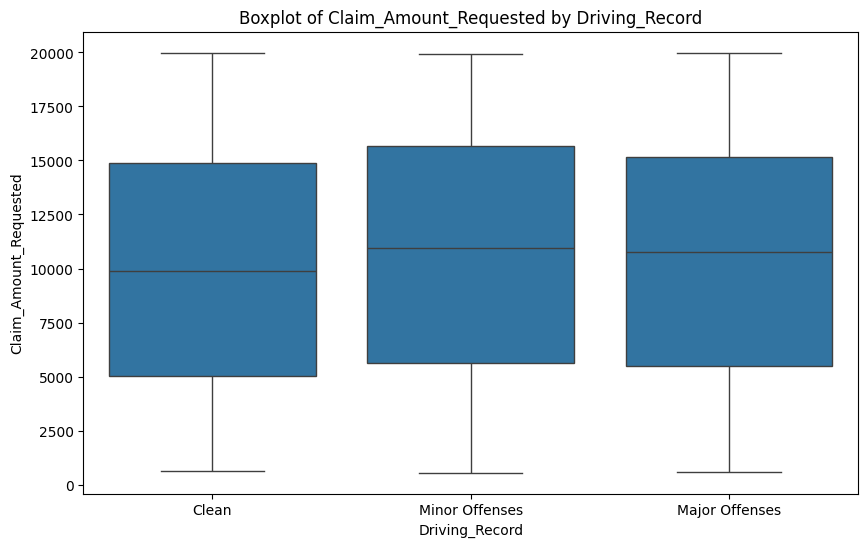

------------------------------
Bivariate analysis for Driving_Record vs. Claim_Approval_Status:


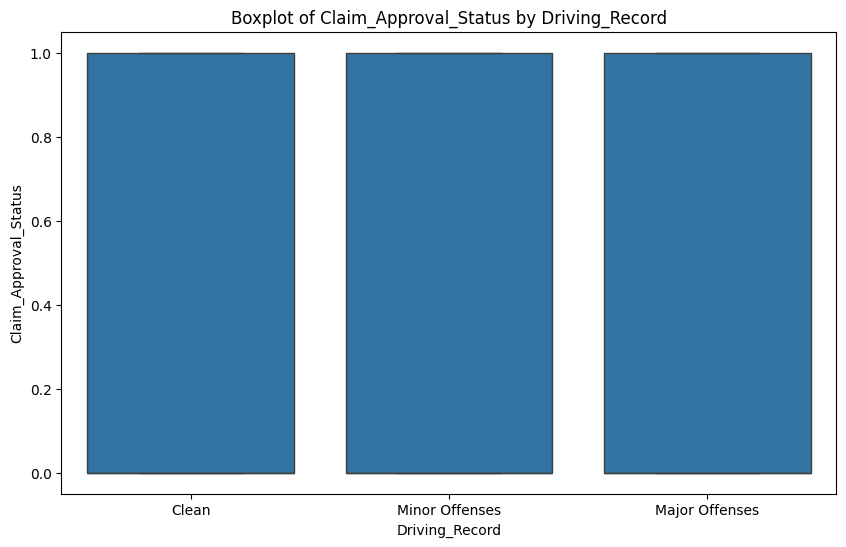

------------------------------
Bivariate analysis for Driving_Record vs. Settlement_Amount:


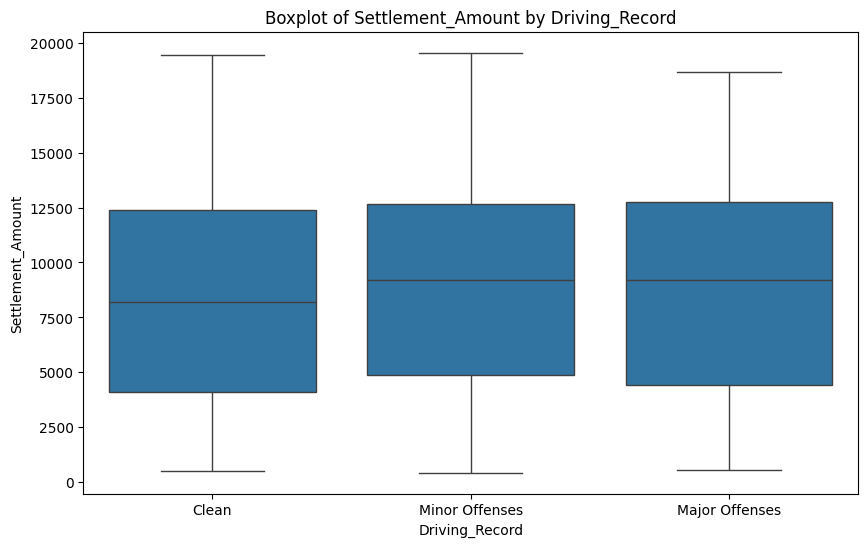

------------------------------
Bivariate analysis for Accident_Severity vs. Policy_Type:


<Figure size 1000x600 with 0 Axes>

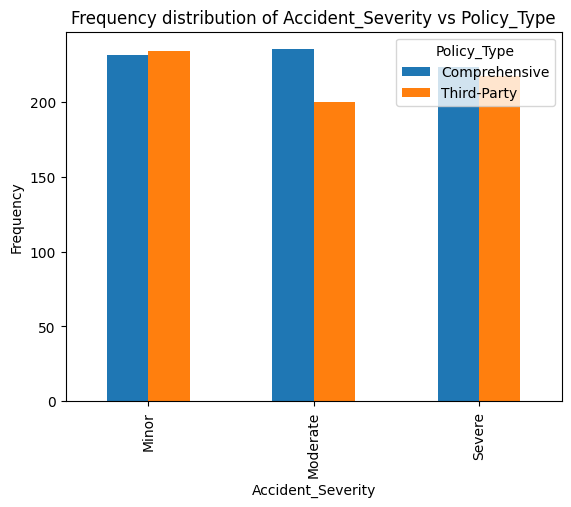

------------------------------
Bivariate analysis for Accident_Severity vs. Driving_Record:


<Figure size 1000x600 with 0 Axes>

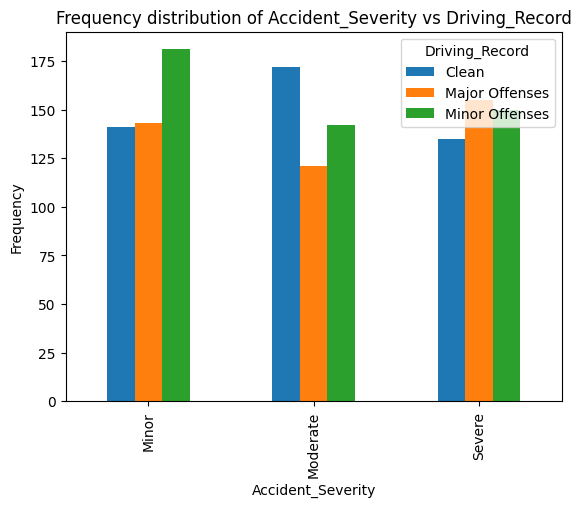

------------------------------
Bivariate analysis for Policy_Type vs. Accident_Severity:


<Figure size 1000x600 with 0 Axes>

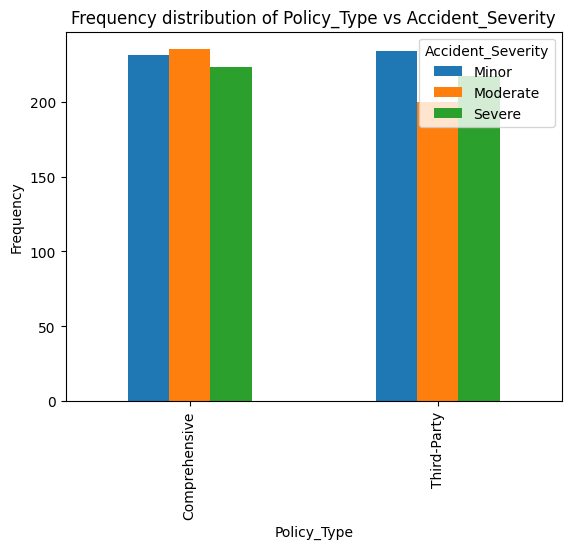

------------------------------
Bivariate analysis for Policy_Type vs. Driving_Record:


<Figure size 1000x600 with 0 Axes>

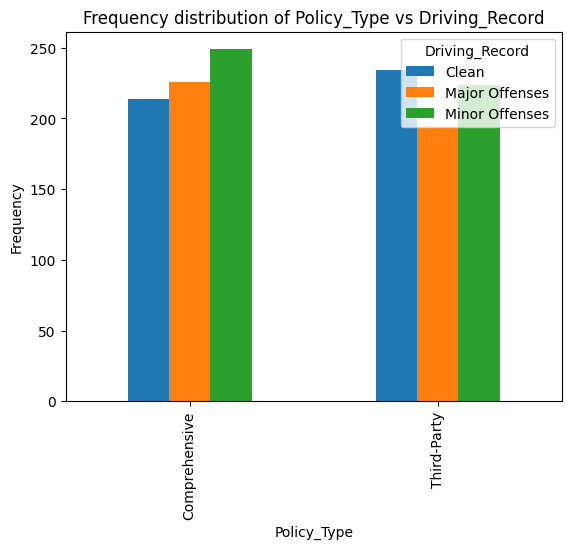

------------------------------
Bivariate analysis for Driving_Record vs. Accident_Severity:


<Figure size 1000x600 with 0 Axes>

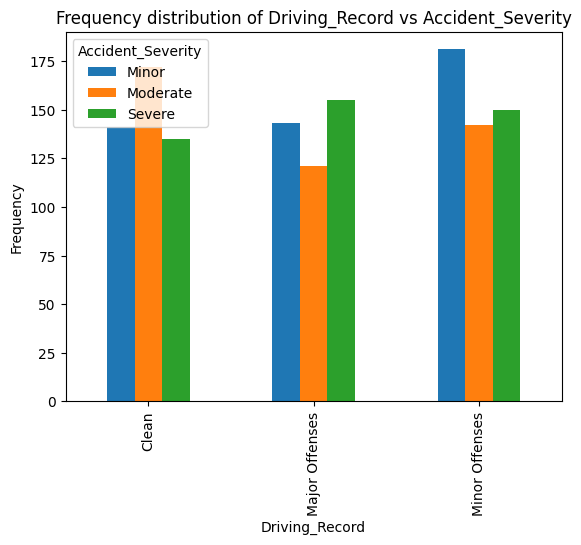

------------------------------
Bivariate analysis for Driving_Record vs. Policy_Type:


<Figure size 1000x600 with 0 Axes>

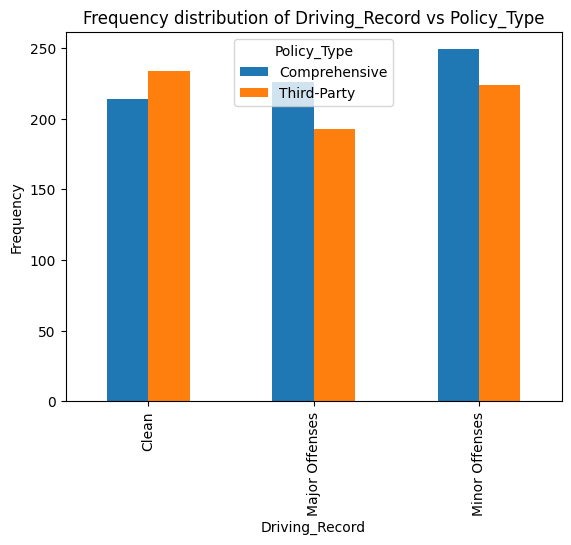

------------------------------


In [22]:
# Bivariate analysis for numerical vs. numerical variables
numerical_cols = data.select_dtypes(include=np.number).columns
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            print(f"Bivariate analysis for {col1} vs. {col2}:")
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f"Scatter plot of {col1} vs. {col2}")
            plt.show()
            print(f"Correlation between {col1} and {col2}: {data[col1].corr(data[col2])}")
            print("-" * 30)


# Bivariate analysis for categorical vs. numerical variables
categorical_cols = data.select_dtypes(exclude=np.number).columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        print(f"Bivariate analysis for {cat_col} vs. {num_col}:")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[cat_col], y=data[num_col])
        plt.title(f"Boxplot of {num_col} by {cat_col}")
        plt.show()
        print("-" * 30)

# Bivariate analysis for categorical vs. categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            print(f"Bivariate analysis for {col1} vs. {col2}:")
            plt.figure(figsize=(10, 6))
            pd.crosstab(data[col1], data[col2]).plot(kind='bar')
            plt.title(f'Frequency distribution of {col1} vs {col2}')
            plt.xlabel(f'{col1}')
            plt.ylabel('Frequency')
            plt.show()
            print("-" * 30)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ATTORNEY                1340 non-null   int64  
 1   CLMSEX                  1340 non-null   float64
 2   CLMINSUR                1340 non-null   float64
 3   SEATBELT                1340 non-null   float64
 4   LOSS                    1340 non-null   float64
 5   Accident_Severity       1340 non-null   object 
 6   Claim_Amount_Requested  1340 non-null   float64
 7   Claim_Approval_Status   1340 non-null   int64  
 8   Settlement_Amount       1340 non-null   float64
 9   Policy_Type             1340 non-null   object 
 10  Driving_Record          1340 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 115.3+ KB


In [94]:
# Perform encoding on categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode (replace with your actual column names)
categorical_cols_to_encode = ['Accident_Severity', 'Policy_Type', 'Driving_Record']


# Loop through each categorical column and apply label encoding
for col in categorical_cols_to_encode:
  if col in data.columns:  #Check if column exists in data
    data[col] = label_encoder.fit_transform(data[col])
  else:
    print(f"Column '{col}' not found in the DataFrame.")

# Display the updated DataFrame with encoded categorical features
print(data.head())

#Check the info of the updated dataframe
print(data.info())

   ATTORNEY  CLMSEX  CLMINSUR  SEATBELT      LOSS  Accident_Severity  \
0         0     0.0       1.0       0.0   2367.86                  2   
1         1     1.0       0.0       0.0   3746.41                  0   
2         1     0.0       1.0       0.0  14282.43                  2   
3         0     0.0       1.0       1.0    519.12                  2   
4         1     0.0       1.0       0.0   1354.31                  0   

   Claim_Amount_Requested  Claim_Approval_Status  Settlement_Amount  \
0                 4497.19                      1            3221.74   
1                 6216.38                      1            6166.17   
2                17978.55                      0           13804.61   
3                  753.54                      1             596.25   
4                 2167.42                      0            1714.83   

   Policy_Type  Driving_Record  
0            1               0  
1            0               0  
2            0               2  
3       

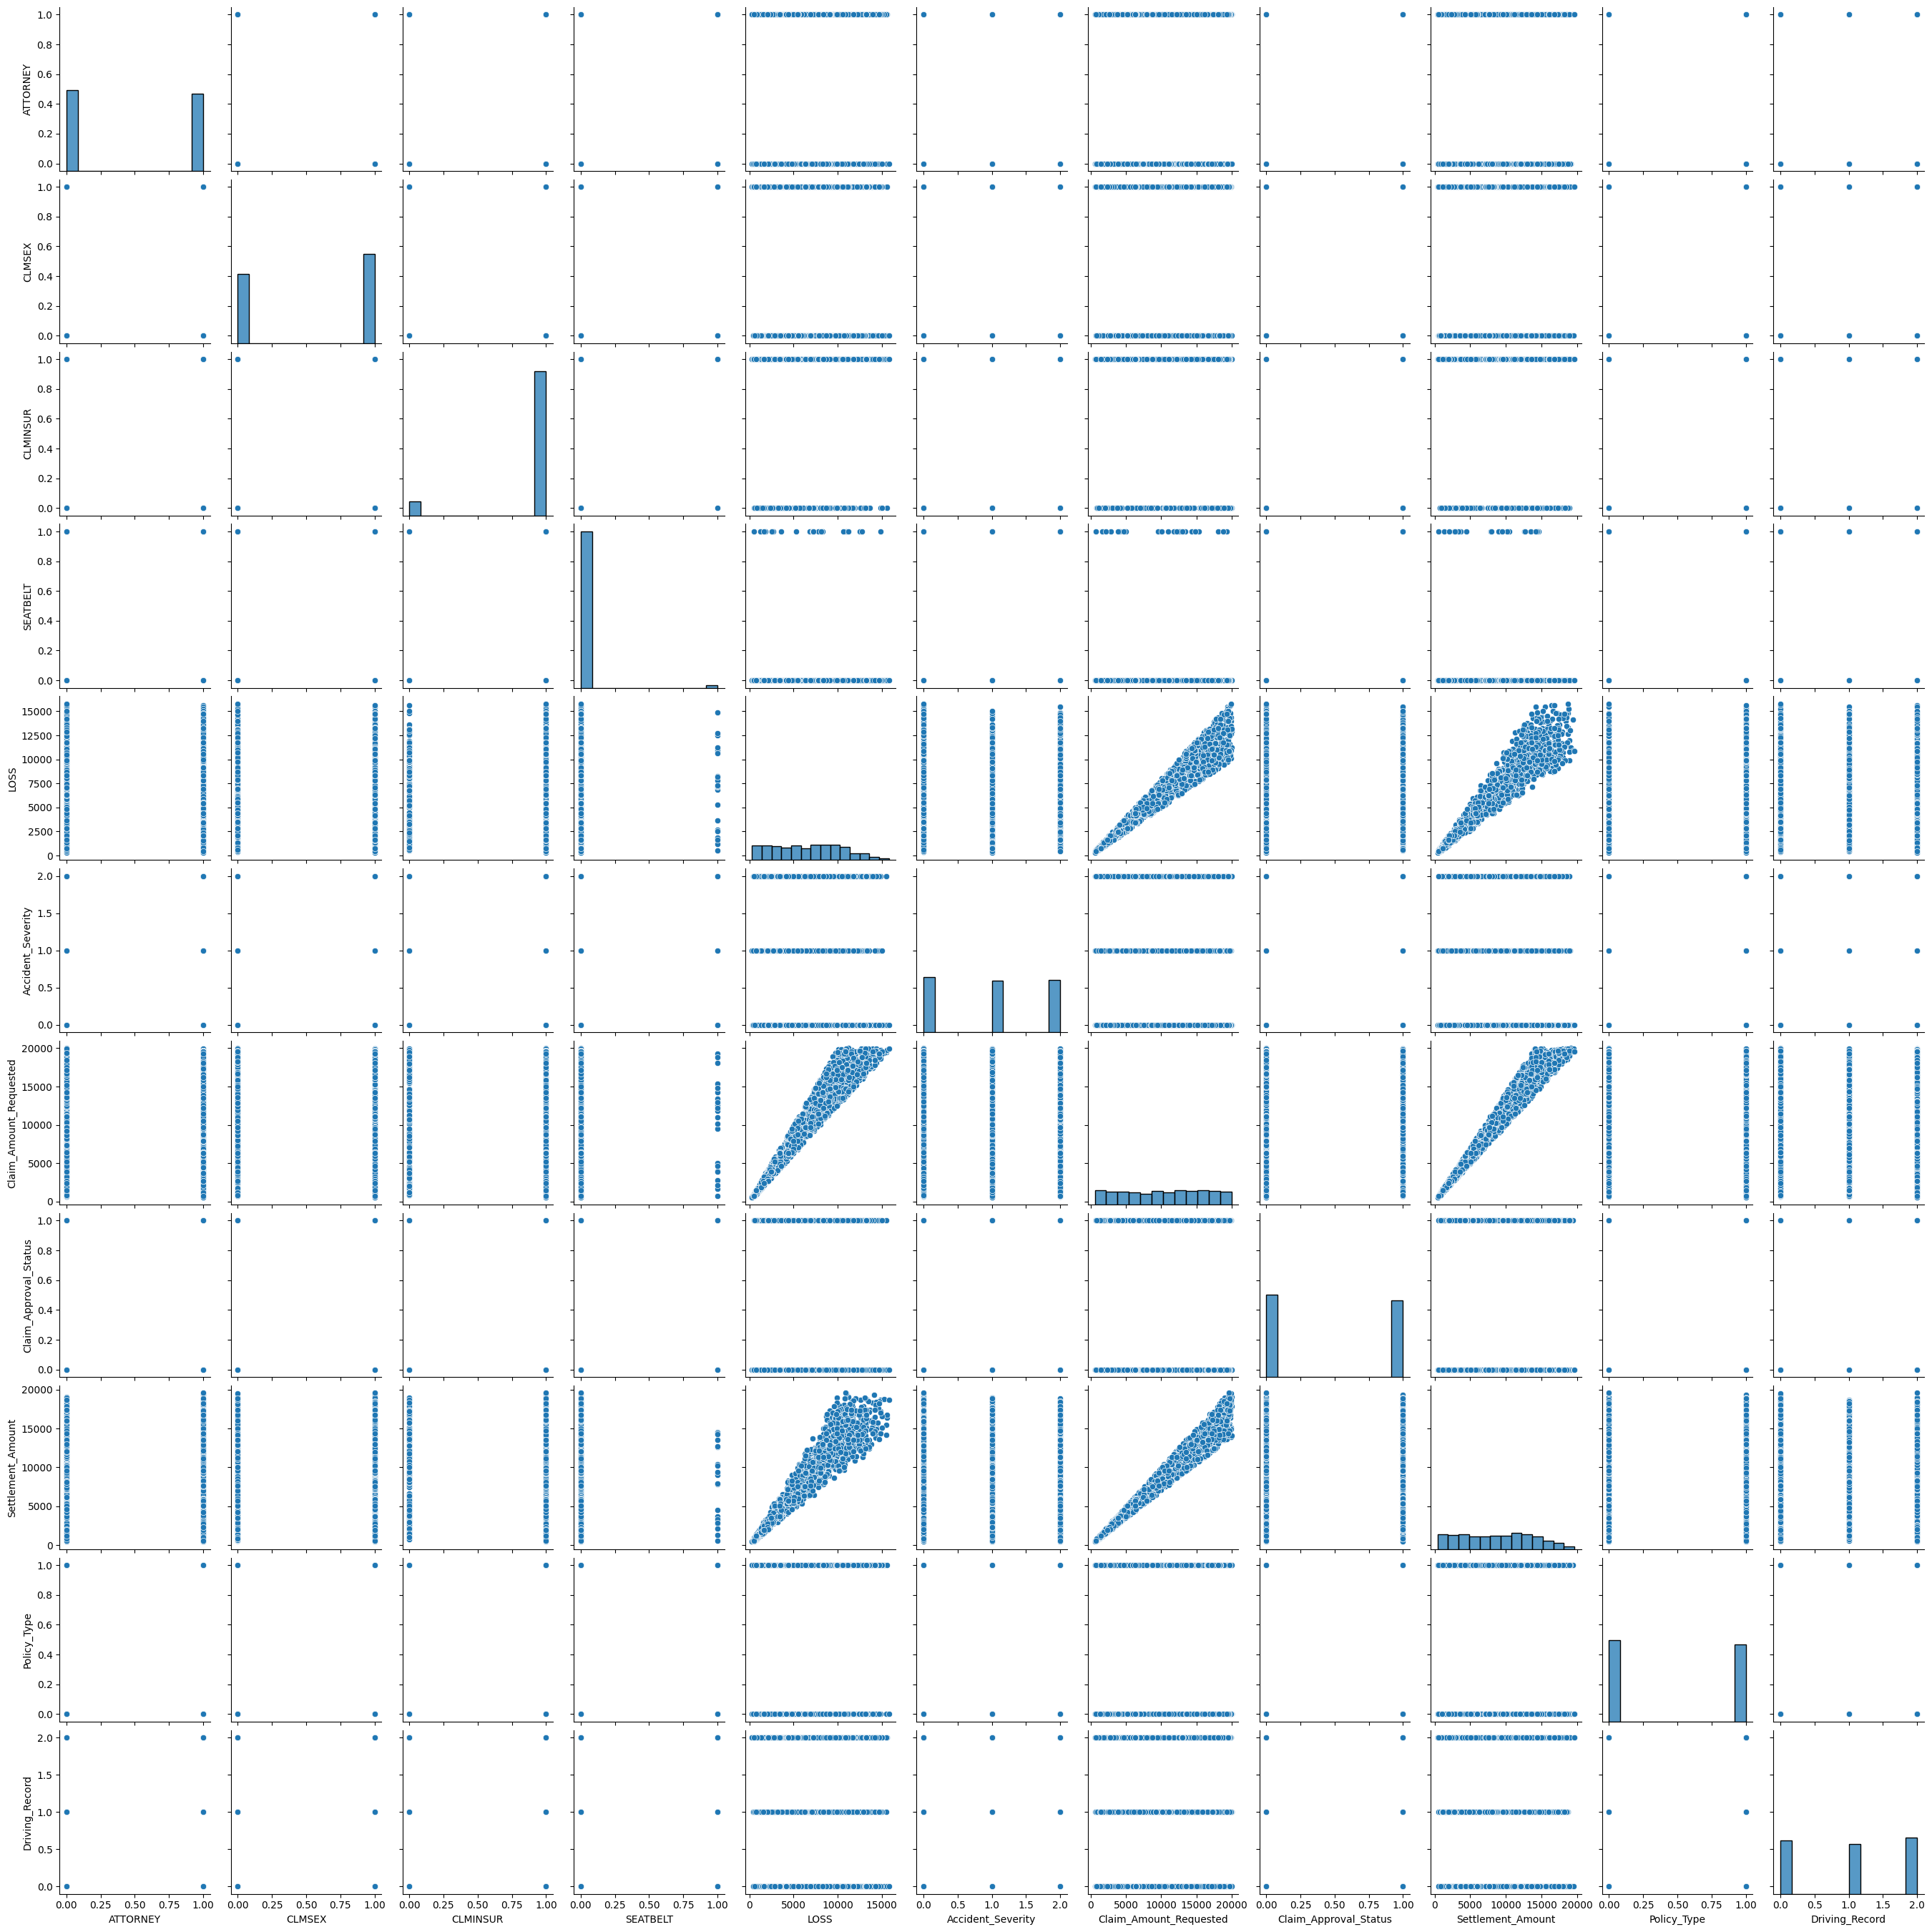

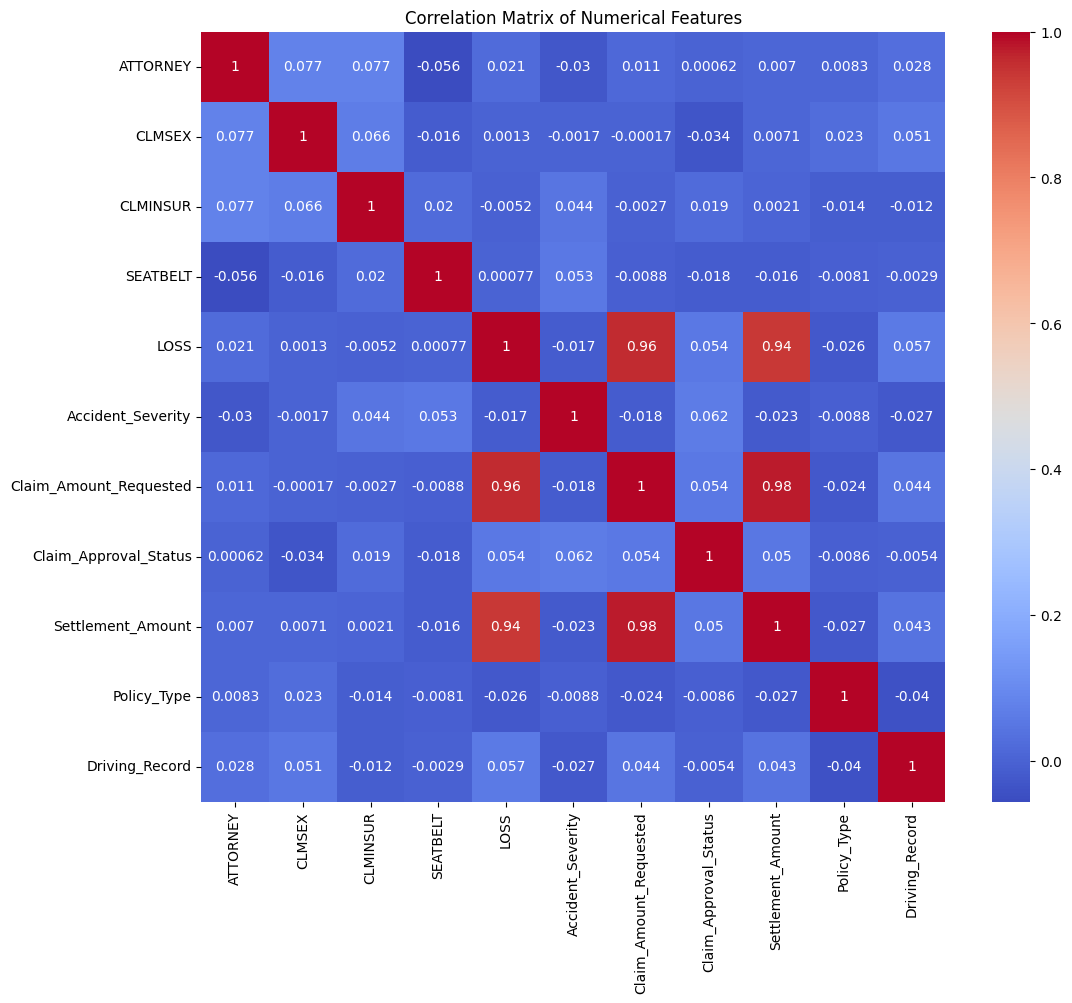

In [95]:
#perform multivariate analysis on variables

# Multivariate analysis
sns.pairplot(data)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [96]:
#remove the high correlated variable
data.drop('LOSS',axis=1,inplace=True)
data.drop('Claim_Amount_Requested',axis=1,inplace=True)

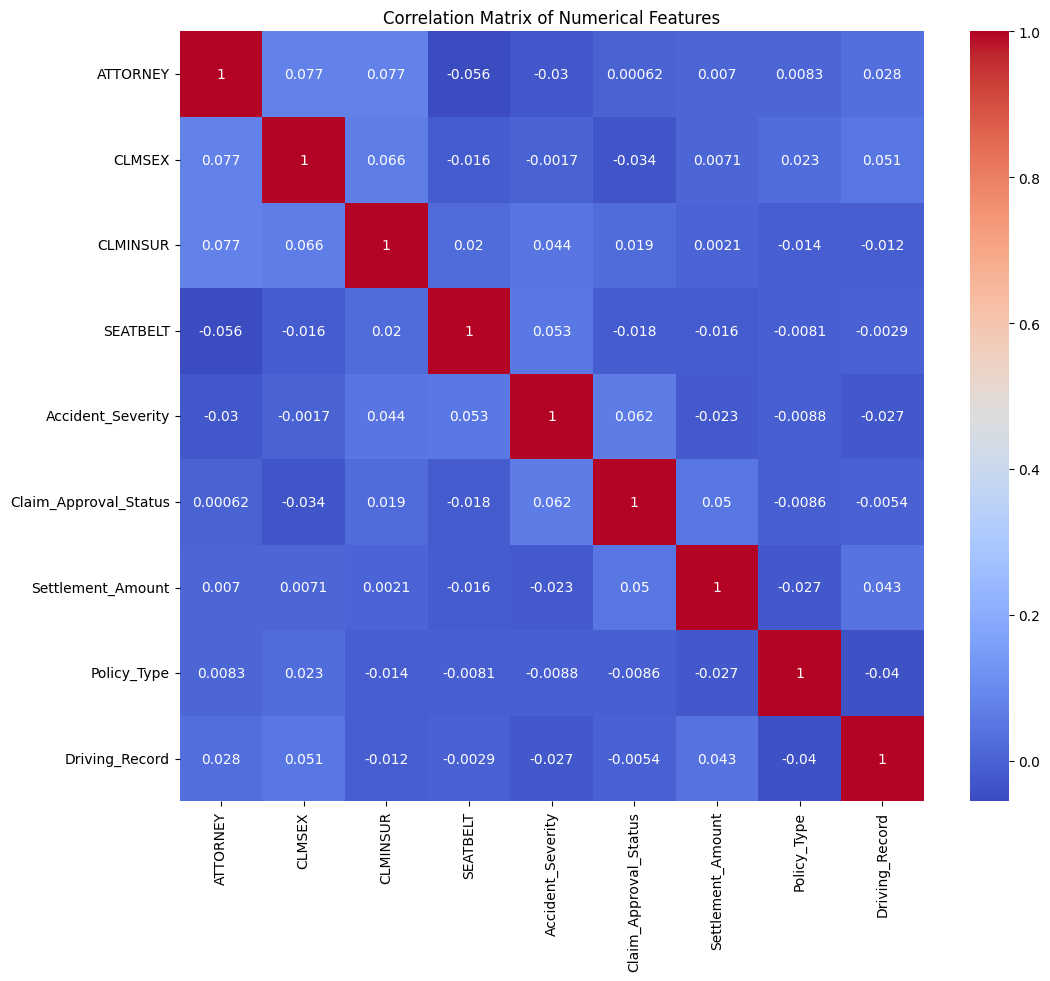

In [97]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [98]:
print(data)

      ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  Accident_Severity  \
0            0     0.0       1.0       0.0                  2   
1            1     1.0       0.0       0.0                  0   
2            1     0.0       1.0       0.0                  2   
3            0     0.0       1.0       1.0                  2   
4            1     0.0       1.0       0.0                  0   
...        ...     ...       ...       ...                ...   
1335         1     0.0       1.0       0.0                  1   
1336         0     1.0       1.0       0.0                  1   
1337         1     1.0       1.0       0.0                  2   
1338         0     1.0       0.0       0.0                  0   
1339         1     1.0       1.0       0.0                  1   

      Claim_Approval_Status  Settlement_Amount  Policy_Type  Driving_Record  
0                         1            3221.74            1               0  
1                         1            6166.17            0    

In [99]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_cols = ['Settlement_Amount', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'Accident_Severity', 'Policy_Type', 'Driving_Record']


# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Now 'data' has scaled numerical features
print(data.head())

   ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  Accident_Severity  \
0       0.0     0.0       1.0       0.0                1.0   
1       1.0     1.0       0.0       0.0                0.0   
2       1.0     0.0       1.0       0.0                1.0   
3       0.0     0.0       1.0       1.0                1.0   
4       1.0     0.0       1.0       0.0                0.0   

   Claim_Approval_Status  Settlement_Amount  Policy_Type  Driving_Record  
0                      1           0.146130          1.0             0.0  
1                      1           0.299951          0.0             0.0  
2                      0           0.698992          0.0             1.0  
3                      1           0.008971          0.0             0.0  
4                      0           0.067407          0.0             0.0  


### MODEL BUILDING AND MODEL EVALUATION

In [100]:
# Split the data into features (X) and target (y)
X = data.drop('ATTORNEY', axis=1)
y = data['ATTORNEY']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate the models
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 30)

Logistic Regression Accuracy: 0.5522388059701493
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53       128
         1.0       0.57      0.57      0.57       140

    accuracy                           0.55       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.55      0.55      0.55       268

------------------------------
Decision Tree Accuracy: 0.5373134328358209
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52       128
         1.0       0.56      0.56      0.56       140

    accuracy                           0.54       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.54      0.54      0.54       268

------------------------------
Random Forest Accuracy: 0.5522388059701493
Random Forest Classification Report:
              precision    recal

In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb


# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #eval_metric for newer xgboost versions


models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 30)

Random Forest Accuracy: 0.5559701492537313
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.56      0.55       128
         1.0       0.58      0.55      0.56       140

    accuracy                           0.56       268
   macro avg       0.56      0.56      0.56       268
weighted avg       0.56      0.56      0.56       268

------------------------------
Gradient Boosting Accuracy: 0.5149253731343284
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.52      0.50       128
         1.0       0.54      0.51      0.53       140

    accuracy                           0.51       268
   macro avg       0.51      0.51      0.51       268
weighted avg       0.52      0.51      0.52       268

------------------------------
XGBoost Accuracy: 0.5223880597014925
XGBoost Classification Report:
              precision    recall  f1-score   su

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example using RandomForestClassifier and RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest (Tuned) Accuracy: {accuracy}")
print(f"Random Forest (Tuned) Classification Report:\n{classification_report(y_test, y_pred)}")
print("-" * 30)


# Example using XGBoost and GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost (Tuned) Accuracy: {accuracy}")
print(f"XGBoost (Tuned) Classification Report:\n{classification_report(y_test, y_pred)}")

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Best score: 0.5317235383612258
Random Forest (Tuned) Accuracy: 0.5373134328358209
Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55       128
         1.0       0.57      0.49      0.53       140

    accuracy                           0.54       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.54      0.54      0.54       268

------------------------------
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.559669637035427
XGBoost (Tuned) Accuracy: 0.5186567164179104
XGBoost (Tuned) Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.55      0.52       128
         1.0       0.54      0.49      0.51       140

    accuracy                           0.52 

In [103]:
data

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  Accident_Severity  \
0          0.0     0.0       1.0       0.0                1.0   
1          1.0     1.0       0.0       0.0                0.0   
2          1.0     0.0       1.0       0.0                1.0   
3          0.0     0.0       1.0       1.0                1.0   
4          1.0     0.0       1.0       0.0                0.0   
...        ...     ...       ...       ...                ...   
1335       1.0     0.0       1.0       0.0                0.5   
1336       0.0     1.0       1.0       0.0                0.5   
1337       1.0     1.0       1.0       0.0                1.0   
1338       0.0     1.0       0.0       0.0                0.0   
1339       1.0     1.0       1.0       0.0                0.5   

      Claim_Approval_Status  Settlement_Amount  Policy_Type  Driving_Record  
0                         1           0.146130          1.0             0.0  
1                         1           0.299951          0.0             0.0  
2                         0           0.698992          0.0             1.0  
3                         1           0.008971          0.0             0.0  
4                         0           0.067407          0.0             0.0  
...                     ...                ...          ...             ...  
1335                      0           0.684829          0.0             0.0  
1336                      0           0.039365          1.0             0.5  
1337                      1           0.854557          1.0             1.0  
1338                      1           0.725706          1.0             0.0  
1339                      1           0.559685          1.0             0.0  

[1340 rows x 9 columns]

In [104]:
import statsmodels.api as sm
# Define the target variable and features
X = data.drop('Claim_Approval_Status', axis=1)
y = data['Claim_Approval_Status']

# Initialize the list to store the selected features
selected_features = []

# Initialize the p-values list for all features
p_values = []

# Perform Recursive Feature Elimination
for i in range(X.shape[1]):  # Iterate through all features
    remaining_features = list(X.columns)
    if selected_features:
        remaining_features = [f for f in remaining_features if f not in selected_features]

    # Fit logistic Regression
    X_model = sm.add_constant(X[remaining_features])  # Add intercept
    model = sm.OLS(y, X_model).fit()

    p_values = model.pvalues.drop('const')  # Drop intercept's p-value
    worst_feature = p_values.idxmax() # Get feature with highest p-value

    # Check if the worst feature's p-value is greater than 0.05
    if p_values.max() > 0.05:
        if worst_feature not in selected_features: # make sure we dont remove a previously selected feature
            X = X.drop(worst_feature, axis=1) # remove the worst feature from features list
    else:
        break # stop if we cannot find features to remove


    # Select the feature with the lowest p-value
    selected_features.append(worst_feature)


print("Selected Features:", selected_features)

Selected Features: ['ATTORNEY', 'Driving_Record', 'Policy_Type', 'CLMINSUR', 'SEATBELT', 'CLMSEX', 'Settlement_Amount']


In [106]:
selected_features = ['Settlement_Amount', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'Policy_Type', 'Driving_Record']

# Split data into features (X) and target (y) using only selected features
X = data[selected_features]
y = data['ATTORNEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models using selected features
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 30)

# Initialize and train ensemble models using selected features
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 30)

Logistic Regression Accuracy: 0.5522388059701493
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53       128
         1.0       0.57      0.57      0.57       140

    accuracy                           0.55       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.55      0.55      0.55       268

------------------------------
Decision Tree Accuracy: 0.5373134328358209
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.57      0.54       128
         1.0       0.56      0.51      0.53       140

    accuracy                           0.54       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.54      0.54      0.54       268

------------------------------
Random Forest Accuracy: 0.5671641791044776
Random Forest Classification Report:
              precision    recal

In [107]:
# Create interaction features
data['ATTORNEY_CLMSEX'] = data['ATTORNEY'] * data['CLMSEX']
data['CLMINSUR_SEATBELT'] = data['CLMINSUR'] * data['SEATBELT']
data['Accident_Severity_Policy_Type'] = data['Accident_Severity'] * data['Policy_Type']

# Create polynomial features
data['ATTORNEY_squared'] = data['ATTORNEY'] ** 2
data['CLMSEX_squared'] = data['CLMSEX'] ** 2

# Create ratio features
data['Settlement_Amount_Policy_Type'] = data['Settlement_Amount'] / (data['Policy_Type'] + 1e-6) # add a small value to prevent division by zero

#remove the features after feature engineering

# Display the first few rows of the updated dataframe to verify the changes
data.head()


ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  Accident_Severity  \
0       0.0     0.0       1.0       0.0                1.0   
1       1.0     1.0       0.0       0.0                0.0   
2       1.0     0.0       1.0       0.0                1.0   
3       0.0     0.0       1.0       1.0                1.0   
4       1.0     0.0       1.0       0.0                0.0   

   Claim_Approval_Status  Settlement_Amount  Policy_Type  Driving_Record  \
0                      1           0.146130          1.0             0.0   
1                      1           0.299951          0.0             0.0   
2                      0           0.698992          0.0             1.0   
3                      1           0.008971          0.0             0.0   
4                      0           0.067407          0.0             0.0   

   ATTORNEY_CLMSEX  CLMINSUR_SEATBELT  Accident_Severity_Policy_Type  \
0              0.0                0.0                            1.0   
1              1.0                0.0                            0.0   
2              0.0                0.0                            0.0   
3              0.0                1.0                            0.0   
4              0.0                0.0                            0.0   

   ATTORNEY_squared  CLMSEX_squared  Settlement_Amount_Policy_Type  
0               0.0             0.0                       0.146130  
1               1.0             1.0                  299950.527610  
2               1.0             0.0                  698991.588649  
3               0.0             0.0                    8971.376539  
4               1.0             0.0                   67407.307182

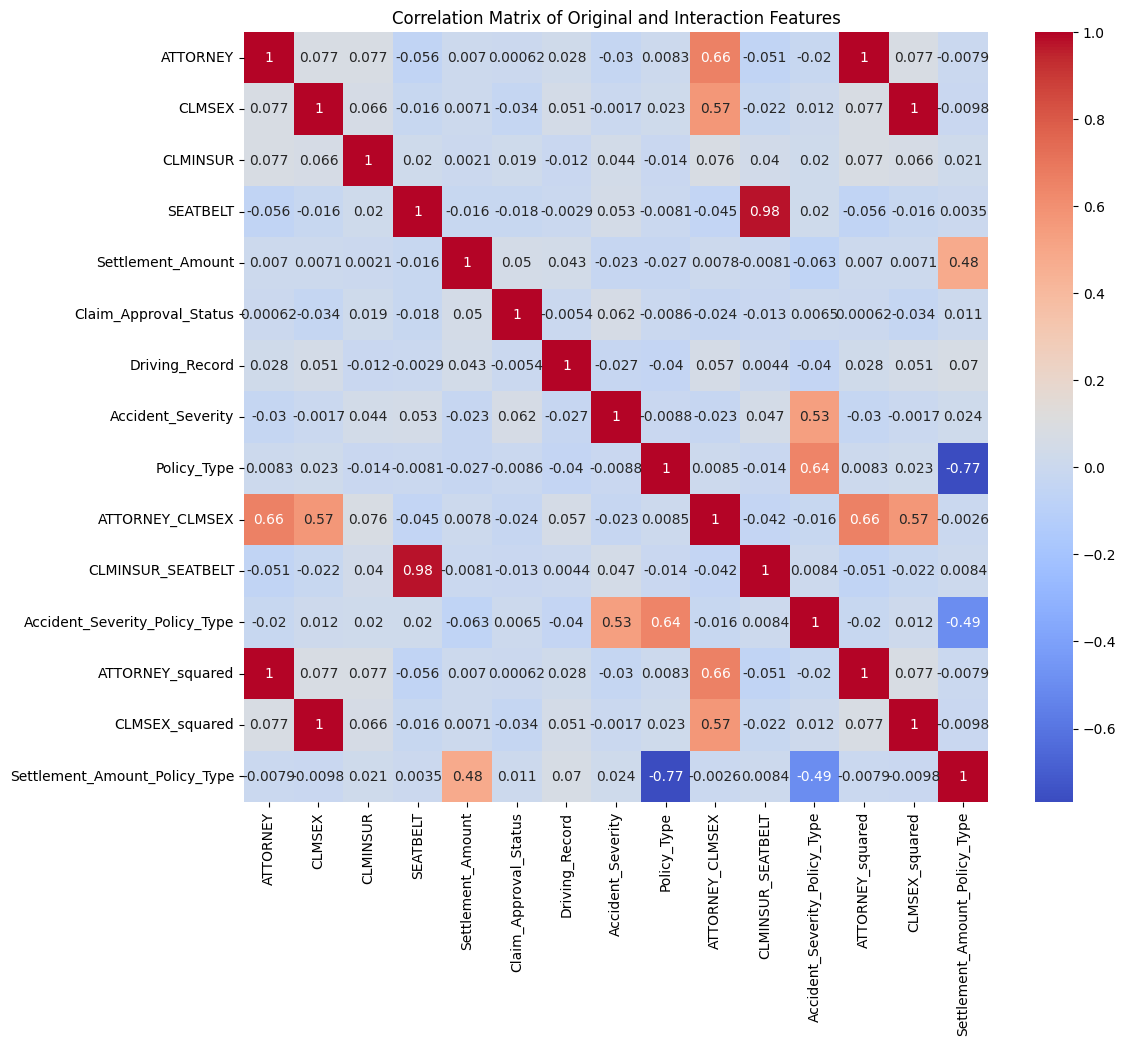

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the original and interaction features for correlation analysis
selected_features = ['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT','Settlement_Amount','Claim_Approval_Status','Driving_Record', 'Accident_Severity', 'Policy_Type',
                     'ATTORNEY_CLMSEX', 'CLMINSUR_SEATBELT', 'Accident_Severity_Policy_Type',
                     'ATTORNEY_squared', 'CLMSEX_squared', 'Settlement_Amount_Policy_Type']

# Calculate the correlation matrix
correlation_matrix = data[selected_features].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Original and Interaction Features')
plt.show()

In [109]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = data.drop('ATTORNEY', axis=1)  # Features (all columns except the target)
y = data['ATTORNEY']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train different classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

Results for Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       128
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Results for Decision Tree:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       128
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Results for Random Forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       128
         1.0       1.00      1.00      

In [110]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred)}")

XGBoost Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       128
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [111]:
#remove high correlated vaiables and bulid the model
data.drop(['ATTORNEY', 'CLMSEX','SEATBELT'], axis = 1, inplace = True)
data

CLMINSUR  Accident_Severity  Claim_Approval_Status  Settlement_Amount  \
0          1.0                1.0                      1           0.146130   
1          0.0                0.0                      1           0.299951   
2          1.0                1.0                      0           0.698992   
3          1.0                1.0                      1           0.008971   
4          1.0                0.0                      0           0.067407   
...        ...                ...                    ...                ...   
1335       1.0                0.5                      0           0.684829   
1336       1.0                0.5                      0           0.039365   
1337       1.0                1.0                      1           0.854557   
1338       0.0                0.0                      1           0.725706   
1339       1.0                0.5                      1           0.559685   

      Policy_Type  Driving_Record  ATTORNEY_CLMSEX  CLMINSUR_SEATBELT  \
0             1.0             0.0              0.0                0.0   
1             0.0             0.0              1.0                0.0   
2             0.0             1.0              0.0                0.0   
3             0.0             0.0              0.0                1.0   
4             0.0             0.0              0.0                0.0   
...           ...             ...              ...                ...   
1335          0.0             0.0              0.0                0.0   
1336          1.0             0.5              0.0                0.0   
1337          1.0             1.0              1.0                0.0   
1338          1.0             0.0              0.0                0.0   
1339          1.0             0.0              1.0                0.0   

      Accident_Severity_Policy_Type  ATTORNEY_squared  CLMSEX_squared  \
0                               1.0               0.0             0.0   
1                               0.0               1.0             1.0   
2                               0.0               1.0             0.0   
3                               0.0               0.0             0.0   
4                               0.0               1.0             0.0   
...                             ...               ...             ...   
1335                            0.0               1.0             0.0   
1336                            0.5               0.0             1.0   
1337                            1.0               1.0             1.0   
1338                            0.0               0.0             1.0   
1339                            0.5               1.0             1.0   

      Settlement_Amount_Policy_Type  
0                          0.146130  
1                     299950.527610  
2                     698991.588649  
3                       8971.376539  
4                      67407.307182  
...                             ...  
1335                  684829.006807  
1336                       0.039365  
1337                       0.854556  
1338                       0.725705  
1339                       0.559685  

[1340 rows x 12 columns]

In [112]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = data.drop('ATTORNEY_squared', axis=1)  # Features (all columns except the target)
y = data['ATTORNEY_squared']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train different classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'classification_report': report
    }
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

Results for Logistic Regression:
Accuracy: 0.7947761194029851
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82       128
         1.0       0.98      0.62      0.76       140

    accuracy                           0.79       268
   macro avg       0.84      0.80      0.79       268
weighted avg       0.85      0.79      0.79       268

Results for Decision Tree:
Accuracy: 0.7910447761194029
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       128
         1.0       0.82      0.76      0.79       140

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

Results for Random Forest:
Accuracy: 0.8171641791044776
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82     

In [113]:
print(data)

      CLMINSUR  Accident_Severity  Claim_Approval_Status  Settlement_Amount  \
0          1.0                1.0                      1           0.146130   
1          0.0                0.0                      1           0.299951   
2          1.0                1.0                      0           0.698992   
3          1.0                1.0                      1           0.008971   
4          1.0                0.0                      0           0.067407   
...        ...                ...                    ...                ...   
1335       1.0                0.5                      0           0.684829   
1336       1.0                0.5                      0           0.039365   
1337       1.0                1.0                      1           0.854557   
1338       0.0                0.0                      1           0.725706   
1339       1.0                0.5                      1           0.559685   

      Policy_Type  Driving_Record  ATTORNEY_CLMSEX 

In [114]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred)}")

XGBoost Accuracy: 0.8022388059701493
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       128
         1.0       0.85      0.76      0.80       140

    accuracy                           0.80       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.80      0.80       268



In [115]:
# Prepare the data
X = data.drop('ATTORNEY_squared', axis=1)  # Features (all columns except the target)
y = data['ATTORNEY_squared']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train ensemble models using selected features
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 30)

Random Forest Accuracy: 0.7985074626865671
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       128
         1.0       0.86      0.73      0.79       140

    accuracy                           0.80       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.80      0.80       268

------------------------------
Gradient Boosting Accuracy: 0.8022388059701493
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81       128
         1.0       0.89      0.71      0.79       140

    accuracy                           0.80       268
   macro avg       0.82      0.81      0.80       268
weighted avg       0.82      0.80      0.80       268

------------------------------


In [116]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'results' dictionary is populated as in the original code
# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Find the model with the highest accuracy
best_model = results_df['accuracy'].idxmax()

print(f"The best performing model is: {best_model}")
print(f"Accuracy: {results_df.loc[best_model, 'accuracy']}")
print(f"Classification Report:\n{results_df.loc[best_model, 'classification_report']}")

The best performing model is: Random Forest
Accuracy: 0.8171641791044776
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       128
         1.0       0.86      0.77      0.82       140

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [118]:
import numpy as np
np.set_printoptions(suppress=True)

# Get the best model from the 'models' dictionary (Assuming models is accessible)
best_model_object = models[best_model]

# Now use the model object for prediction:
pred_prob = best_model_object.predict_proba(X)
pred_prob

array([[0.86, 0.14],
       [0.01, 0.99],
       [0.08, 0.92],
       ...,
       [0.02, 0.98],
       [0.97, 0.03],
       [0.  , 1.  ]])

In [119]:
pred_prob=pd.DataFrame(pred_prob)
#pred_prob['y_pred'] = classifier.predict(X)[0:20]
pred_prob.rename({0:'0:Probability for Appointing Attorney', 1: '1:Probability for Not Appointing Attorney'}, inplace=True, axis=1)
pred_prob['Predictions_Manual']=pred_prob.iloc[:,1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob['Predicted_Decision']=pred_prob.iloc[:,2].apply(lambda x: 'Appointing Attorney' if x==0 else 'Not Appointing Attorney')
pred_prob

0:Probability for Appointing Attorney  \
0                                      0.86   
1                                      0.01   
2                                      0.08   
3                                      0.75   
4                                      0.21   
...                                     ...   
1335                                   0.32   
1336                                   1.00   
1337                                   0.02   
1338                                   0.97   
1339                                   0.00   

      1:Probability for Not Appointing Attorney  Predictions_Manual  \
0                                          0.14                   0   
1                                          0.99                   1   
2                                          0.92                   1   
3                                          0.25                   0   
4                                          0.79                   1   
...                                         ...                 ...   
1335                                       0.68                   1   
1336                                       0.00                   0   
1337                                       0.98                   1   
1338                                       0.03                   0   
1339                                       1.00                   1   

           Predicted_Decision  
0         Appointing Attorney  
1     Not Appointing Attorney  
2     Not Appointing Attorney  
3         Appointing Attorney  
4     Not Appointing Attorney  
...                       ...  
1335  Not Appointing Attorney  
1336      Appointing Attorney  
1337  Not Appointing Attorney  
1338      Appointing Attorney  
1339  Not Appointing Attorney  

[1340 rows x 4 columns]

In [120]:
#Predictions for X dataset
y_pred = best_model_object.predict(X)
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [121]:
pred_prob['Predictions_Model'] = best_model_object.predict(X)
pred_prob

0:Probability for Appointing Attorney  \
0                                      0.86   
1                                      0.01   
2                                      0.08   
3                                      0.75   
4                                      0.21   
...                                     ...   
1335                                   0.32   
1336                                   1.00   
1337                                   0.02   
1338                                   0.97   
1339                                   0.00   

      1:Probability for Not Appointing Attorney  Predictions_Manual  \
0                                          0.14                   0   
1                                          0.99                   1   
2                                          0.92                   1   
3                                          0.25                   0   
4                                          0.79                   1   
...                                         ...                 ...   
1335                                       0.68                   1   
1336                                       0.00                   0   
1337                                       0.98                   1   
1338                                       0.03                   0   
1339                                       1.00                   1   

           Predicted_Decision  Predictions_Model  
0         Appointing Attorney                0.0  
1     Not Appointing Attorney                1.0  
2     Not Appointing Attorney                1.0  
3         Appointing Attorney                0.0  
4     Not Appointing Attorney                1.0  
...                       ...                ...  
1335  Not Appointing Attorney                1.0  
1336      Appointing Attorney                0.0  
1337  Not Appointing Attorney                1.0  
1338      Appointing Attorney                0.0  
1339  Not Appointing Attorney                1.0  

[1340 rows x 5 columns]

In [122]:
y_pred_df= pd.DataFrame({'Actual': y,
                         'Predictions': best_model_object.predict(X)})
y_pred_df

Actual  Predictions
0        0.0          0.0
1        1.0          1.0
2        1.0          1.0
3        0.0          0.0
4        1.0          1.0
...      ...          ...
1335     1.0          1.0
1336     0.0          0.0
1337     1.0          1.0
1338     0.0          0.0
1339     1.0          1.0

[1340 rows x 2 columns]

In [123]:
Output_DF=pd.concat([pred_prob,y_pred_df], axis=1)
Output_DF= Output_DF.iloc[:,[0,1,4,3,5]]
Output_DF['Actual_Decision']=Output_DF.loc[:,'Actual'].apply(lambda x: 'Appointing Attorney' if x==0 else 'Not Appointing Attorney')
Output_DF

0:Probability for Appointing Attorney  \
0                                      0.86   
1                                      0.01   
2                                      0.08   
3                                      0.75   
4                                      0.21   
...                                     ...   
1335                                   0.32   
1336                                   1.00   
1337                                   0.02   
1338                                   0.97   
1339                                   0.00   

      1:Probability for Not Appointing Attorney  Predictions_Model  \
0                                          0.14                0.0   
1                                          0.99                1.0   
2                                          0.92                1.0   
3                                          0.25                0.0   
4                                          0.79                1.0   
...                                         ...                ...   
1335                                       0.68                1.0   
1336                                       0.00                0.0   
1337                                       0.98                1.0   
1338                                       0.03                0.0   
1339                                       1.00                1.0   

           Predicted_Decision  Actual          Actual_Decision  
0         Appointing Attorney     0.0      Appointing Attorney  
1     Not Appointing Attorney     1.0  Not Appointing Attorney  
2     Not Appointing Attorney     1.0  Not Appointing Attorney  
3         Appointing Attorney     0.0      Appointing Attorney  
4     Not Appointing Attorney     1.0  Not Appointing Attorney  
...                       ...     ...                      ...  
1335  Not Appointing Attorney     1.0  Not Appointing Attorney  
1336      Appointing Attorney     0.0      Appointing Attorney  
1337  Not Appointing Attorney     1.0  Not Appointing Attorney  
1338      Appointing Attorney     0.0      Appointing Attorney  
1339  Not Appointing Attorney     1.0  Not Appointing Attorney  

[1340 rows x 6 columns]

In [124]:
TP=len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Predictions']==1)])
TN=len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Predictions']==0)])
FP=len(y_pred_df[(y_pred_df['Actual']==0) & (y_pred_df['Predictions']==1)])
FN=len(y_pred_df[(y_pred_df['Actual']==1) & (y_pred_df['Predictions']==0)])

In [125]:
print('True Positives', TP)
print('True Negatives', TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 617
True Negatives 669
False Positives 16
False Negatives 38


In [126]:
Result=[]
for i in range(len(y_pred_df)):
    if (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Predictions']==1):
      Result.append('True Positive')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Predictions']==0):
      Result.append('True Negative')
    elif (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Predictions']==0):
      Result.append('False Negative')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Predictions']==1):
      Result.append('False Positive')
    else:
      Result.append('Invalid')

y_pred_df['Result']=pd.Series(Result)
y_pred_df[0:30]

#y_pred_df.drop('index',axis=1,inplace=True)
y_pred_df

Actual  Predictions         Result
0        0.0          0.0  True Negative
1        1.0          1.0  True Positive
2        1.0          1.0  True Positive
3        0.0          0.0  True Negative
4        1.0          1.0  True Positive
...      ...          ...            ...
1335     1.0          1.0  True Positive
1336     0.0          0.0  True Negative
1337     1.0          1.0  True Positive
1338     0.0          0.0  True Negative
1339     1.0          1.0  True Positive

[1340 rows x 3 columns]

In [127]:
y_pred_df['Result'].value_counts()

Result
True Negative     669
True Positive     617
False Negative     38
False Positive     16
Name: count, dtype: int64

In [128]:
'''With the code below, we are finding out the cases where the model predictions
match the actual values in the data, and cross-checking the accuracy of the model'''
print('Correctly predicted obs',len(y_pred_df[y_pred_df['Actual']==y_pred_df['Predictions']]))
print('Total Number of obs',len(y_pred_df))

print('Accuracy is',(len(y_pred_df[y_pred_df['Actual']==y_pred_df['Predictions']])/len(y_pred_df))*100,'%')

Correctly predicted obs 1286
Total Number of obs 1340
Accuracy is 95.97014925373134 %


In [129]:
data

CLMINSUR  Accident_Severity  Claim_Approval_Status  Settlement_Amount  \
0          1.0                1.0                      1           0.146130   
1          0.0                0.0                      1           0.299951   
2          1.0                1.0                      0           0.698992   
3          1.0                1.0                      1           0.008971   
4          1.0                0.0                      0           0.067407   
...        ...                ...                    ...                ...   
1335       1.0                0.5                      0           0.684829   
1336       1.0                0.5                      0           0.039365   
1337       1.0                1.0                      1           0.854557   
1338       0.0                0.0                      1           0.725706   
1339       1.0                0.5                      1           0.559685   

      Policy_Type  Driving_Record  ATTORNEY_CLMSEX  CLMINSUR_SEATBELT  \
0             1.0             0.0              0.0                0.0   
1             0.0             0.0              1.0                0.0   
2             0.0             1.0              0.0                0.0   
3             0.0             0.0              0.0                1.0   
4             0.0             0.0              0.0                0.0   
...           ...             ...              ...                ...   
1335          0.0             0.0              0.0                0.0   
1336          1.0             0.5              0.0                0.0   
1337          1.0             1.0              1.0                0.0   
1338          1.0             0.0              0.0                0.0   
1339          1.0             0.0              1.0                0.0   

      Accident_Severity_Policy_Type  ATTORNEY_squared  CLMSEX_squared  \
0                               1.0               0.0             0.0   
1                               0.0               1.0             1.0   
2                               0.0               1.0             0.0   
3                               0.0               0.0             0.0   
4                               0.0               1.0             0.0   
...                             ...               ...             ...   
1335                            0.0               1.0             0.0   
1336                            0.5               0.0             1.0   
1337                            1.0               1.0             1.0   
1338                            0.0               0.0             1.0   
1339                            0.5               1.0             1.0   

      Settlement_Amount_Policy_Type  
0                          0.146130  
1                     299950.527610  
2                     698991.588649  
3                       8971.376539  
4                      67407.307182  
...                             ...  
1335                  684829.006807  
1336                       0.039365  
1337                       0.854556  
1338                       0.725705  
1339                       0.559685  

[1340 rows x 12 columns]

In [53]:
# import pandas as pd
# import numpy as np

# # Create a sample dataframe with random data similar to the provided structure.
# np.random.seed(0) # for reproducibility
# num_rows = 5
# data = {
#     'CLMINSUR': np.random.randint(0, 2, num_rows),
#     'Accident_Severity': np.random.randint(0, 2, num_rows),
#     'Claim_Approval_Status': np.random.randint(0, 2, num_rows),
#     'Settlement_Amount': np.random.rand(num_rows),  # Random values between 0 and 1
#     'Policy_Type': np.random.randint(0, 2, num_rows),
#     'Driving_Record': np.random.randint(0, 2, num_rows),
#     'ATTORNEY_CLMSEX': np.random.randint(0, 2, num_rows),
#     'CLMINSUR_SEATBELT': np.random.randint(0, 2, num_rows),
#     'Accident_Severity_Policy_Type': np.random.randint(0, 2, num_rows),
#     'ATTORNEY_squared': np.random.randint(0, 2, num_rows),
#     'CLMSEX_squared': np.random.randint(0, 2, num_rows),
#     'Settlement_Amount_Policy_Type': np.random.rand(num_rows) * 1000000 # values up to 1 million
# }

# sample_data = pd.DataFrame(data)


# # Check if the climate is appointing an attorney based on random input data
# # (Replace this with your actual model prediction logic)
# # Assuming ATTORNEY_CLMSEX is the target variable


# # Example prediction using a simple rule: if Settlement Amount > 0.5, predict 1 else 0
# sample_data['Predicted_ATTORNEY'] = (sample_data['Settlement_Amount'] > 0.5).astype(int)

# sample_data


In [54]:
import pickle

In [55]:
filename = 'insurance_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [56]:
loaded_model = pickle.load(open('insurance_trained_model.sav', 'rb'))

In [63]:
# import pandas as pd
# import numpy as np

# # Function to get user input for each feature
# def get_user_input(num_rows=1):
#     inputs = []
#     print("Enter values for the dataset (0 or 1 for binary fields, any number for others):")
#     for i in range(num_rows):
#         print(f"Row {i + 1}:")
#         inputs.append({
#             'CLMINSUR': int(input("CLMINSUR (0 or 1): ")),
#             'Accident_Severity': int(input("Accident_Severity (0 or 1): ")),
#             'Claim_Approval_Status': int(input("Claim_Approval_Status (0 or 1): ")),
#             'Settlement_Amount': float(input("Settlement_Amount (any number): ")),
#             'Policy_Type': int(input("Policy_Type (0 or 1): ")),
#             'Driving_Record': int(input("Driving_Record (0 or 1): ")),
#             'ATTORNEY': int(input("ATTORNEY (0 or 1): ")),
#             'CLMSEX': int(input("CLMSEX (0 or 1): ")),
#             'SEATBELT': int(input("SEATBELT (0 or 1): "))
#         })
#     return inputs

# # Collect user inputs
# num_rows = int(input("Enter the number of rows to input: "))
# user_data = get_user_input(num_rows)

# # Convert to DataFrame
# sample_data = pd.DataFrame(user_data)

# # Calculate interaction features
# sample_data['ATTORNEY_CLMSEX'] = sample_data['ATTORNEY'] * sample_data['CLMSEX']
# sample_data['ATTORNEY_SEATBELT'] = sample_data['ATTORNEY'] * sample_data['SEATBELT']
# sample_data['CLMSEX_SEATBELT'] = sample_data['CLMSEX'] * sample_data['SEATBELT']

# # Calculate the probability of appointing an attorney
# # Assume the probability is a normalized weighted sum of features
# weights = {
#     'Settlement_Amount': 0.5,
#     'ATTORNEY_CLMSEX': 0.2,
#     'ATTORNEY_SEATBELT': 0.2,
#     'CLMSEX_SEATBELT': 0.1
# }

# # Calculate weighted sum of relevant features
# sample_data['Appointing_Probability'] = (
#     weights['Settlement_Amount'] * sample_data['Settlement_Amount'] +
#     weights['ATTORNEY_CLMSEX'] * sample_data['ATTORNEY_CLMSEX'] +
#     weights['ATTORNEY_SEATBELT'] * sample_data['ATTORNEY_SEATBELT'] +
#     weights['CLMSEX_SEATBELT'] * sample_data['CLMSEX_SEATBELT']
# )

# # Apply sigmoid function to scale probabilities between 0 and 1
# sample_data['Appointing_Probability'] = 1 / (1 + np.exp(-sample_data['Appointing_Probability']))

# # Predict appointing attorney based on a threshold (e.g., probability > 0.5)
# sample_data['Predicted_ATTORNEY'] = (sample_data['Appointing_Probability'] > 0.5).astype(int)

# # Display the final dataframe
# print("\nFinal DataFrame:")
# print(sample_data)

Enter the number of rows to input: 1
Enter values for the dataset (0 or 1 for binary fields, any number for others):
Row 1:
CLMINSUR (0 or 1): 1
Accident_Severity (0 or 1): 1
Claim_Approval_Status (0 or 1): 1
Settlement_Amount (any number): 0.146130
Policy_Type (0 or 1): 1
Driving_Record (0 or 1): 0
ATTORNEY (0 or 1): 0
CLMSEX (0 or 1): 0
SEATBELT (0 or 1): 0

Final DataFrame:
   CLMINSUR  Accident_Severity  Claim_Approval_Status  Settlement_Amount  \
0         1                  1                      1            0.14613   

   Policy_Type  Driving_Record  ATTORNEY  CLMSEX  SEATBELT  ATTORNEY_CLMSEX  \
0            1               0         0       0         0                0   

   ATTORNEY_SEATBELT  CLMSEX_SEATBELT  Appointing_Probability  \
0                  0                0                0.518258   

   Predicted_ATTORNEY  
0                   1  
